In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
!pip install matplotlib
import matplotlib.pyplot as plt

## TOC:
### Table of Contents

* [Feature Engineering](#feature-engineering)
    * [1. Data Intuition](#data-intuition)
    * [2. Numeric Data](#numeric-data)
    * [3. Categorical Variables](#category)
    * [4. Testing for Normality](#normality)

     
* [Modeling](#chapter2)
    * [Linear Regression](#linear)
    * [Lasso Regression](#lasso)
    * [Ridge Regression](#ridge)
    * [ElasticNet Regression](#elastic)
    * [Random Forest Regression](#randomforest)
    * [XGBoost Regression](#xgboost)
    * [Stacking](#stacking)
    
    
    

In [2]:
train=pd.read_csv('https://raw.githubusercontent.com/nguyenkhoi6394/Iowa-House-Price-Prediction/main/train.csv')
test=pd.read_csv('https://raw.githubusercontent.com/nguyenkhoi6394/Iowa-House-Price-Prediction/main/test.csv')

In [3]:
train_data=train.copy()
test_data=test.copy()

In [4]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
quantitative = [f for f in train_data.columns if train_data.dtypes[f] != 'object']
qualitative=[f for f in train_data.columns if train_data.dtypes[f]=='object']

# Feature Engineering <a class="anchor" id="feature-engineering"></a>


## 1. Data Intuition <a class="anchor" id="data-intuition"></a>

Before diving into the dataset, I will first look at all the features and go through all of them to have a sense of all available features. 

I will break features into 3 groups: Building, Location and Space. I will also set an estimation based on my intuition on the impact of these features to our dependent variables (High, Medium, Low).

Throughout this exercise, I can also have some ideas for feature generation as well as identifying those variables that seem to overlap.

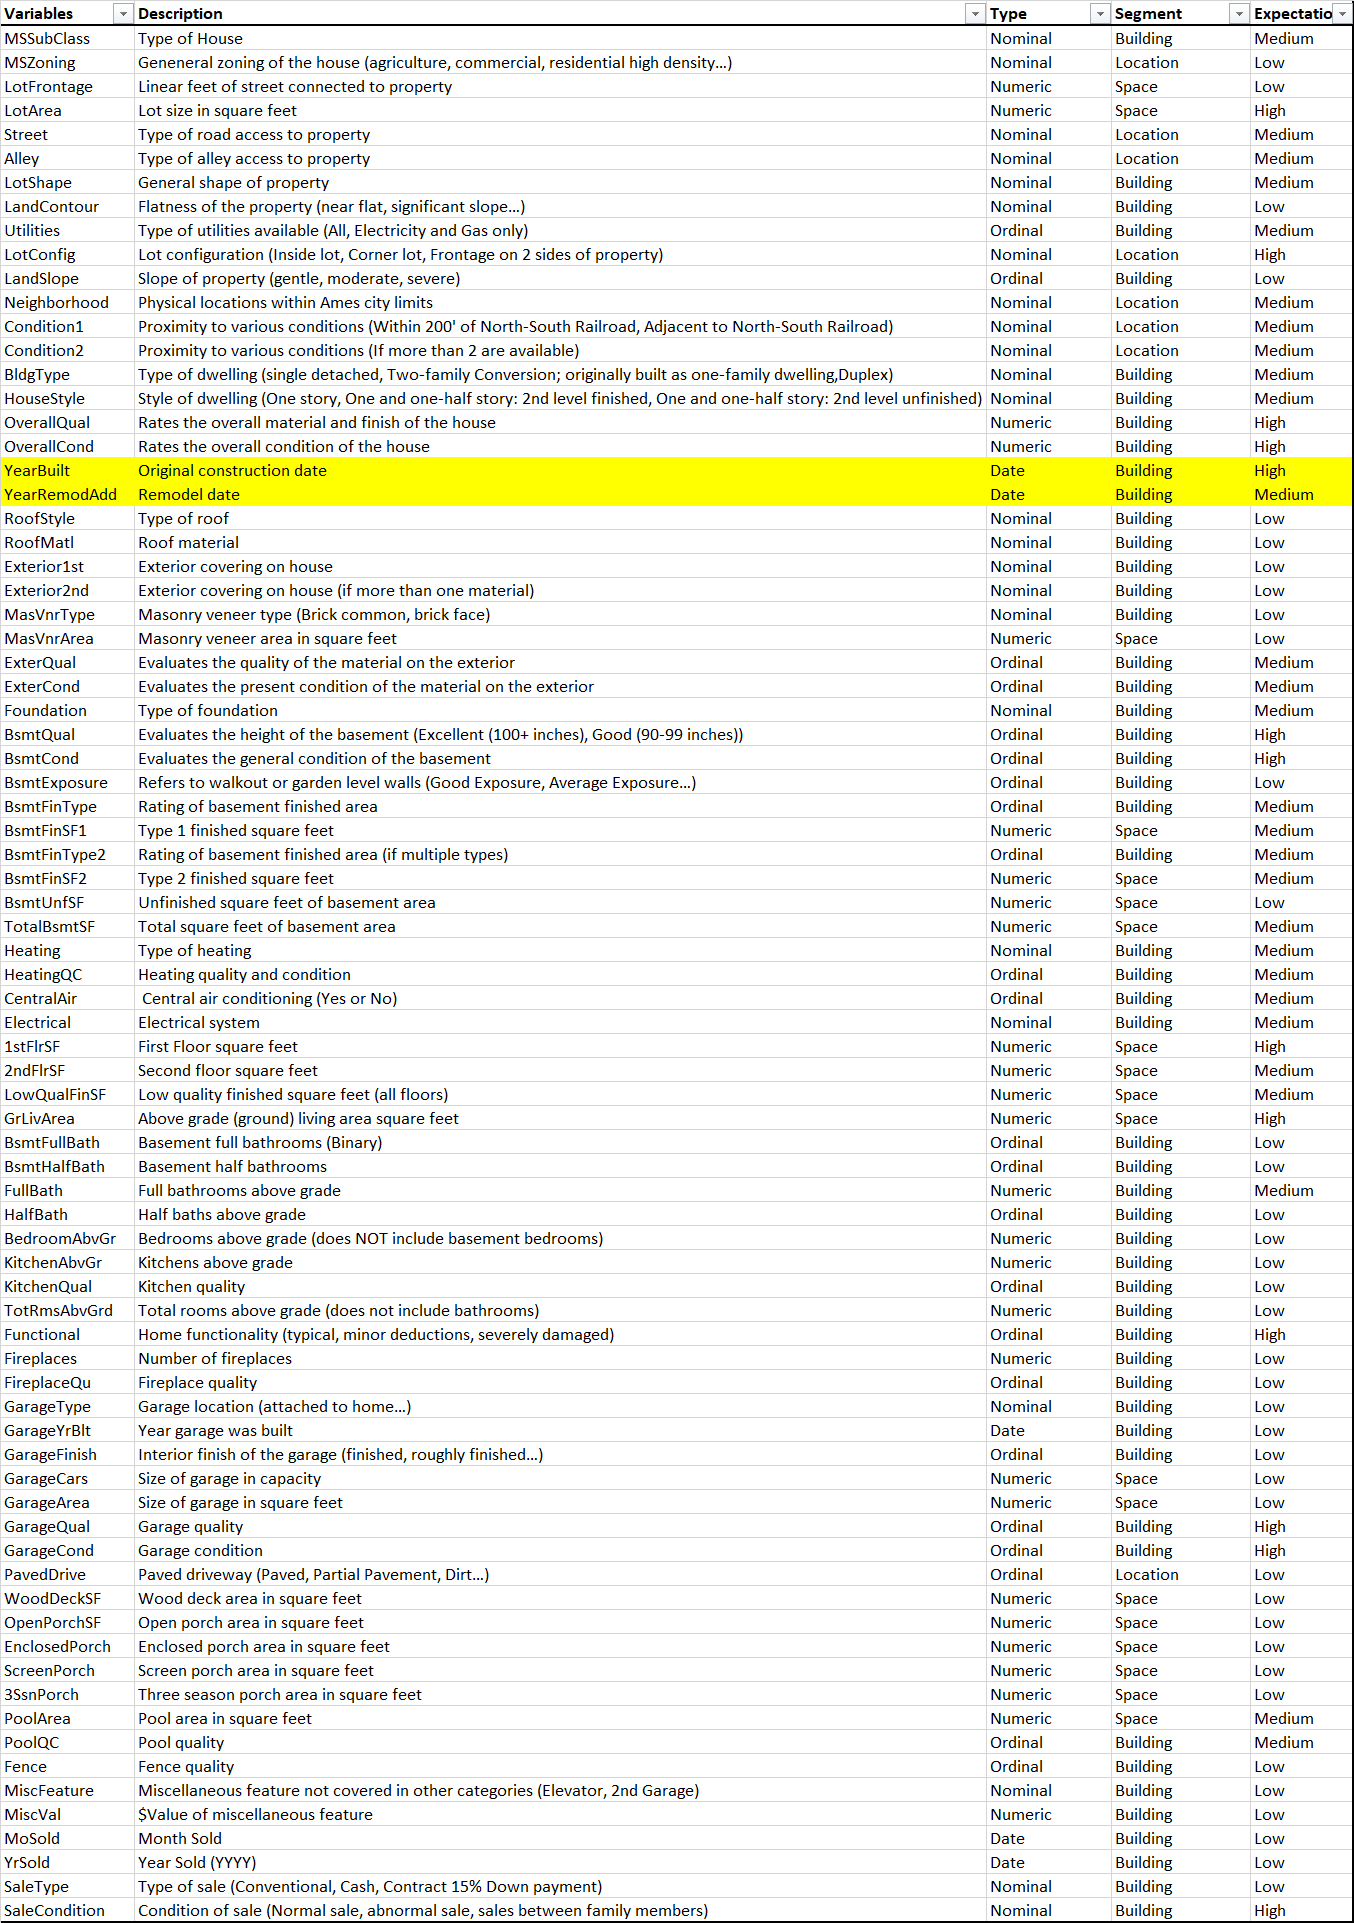

## 2. Numeric Data <a class="anchor" id="numeric-data"></a>

## 1. Overall <a class="anchor" id="overall"></a>

We will first look at the target variable "SalePrice"

<AxesSubplot:xlabel='SalePrice'>

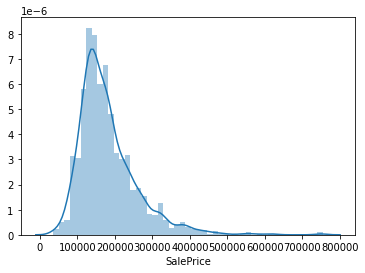

In [6]:
sns.distplot(train_data['SalePrice'])

In [7]:
train_data['SalePrice'].describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.99])

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64

The data seems to be right skewed with some exceptionally high values. We can consider to keep or drop these instances. 
Since the competition will judge us based on RMSE, many outliers may lead our prediction to be heavily penalized. 

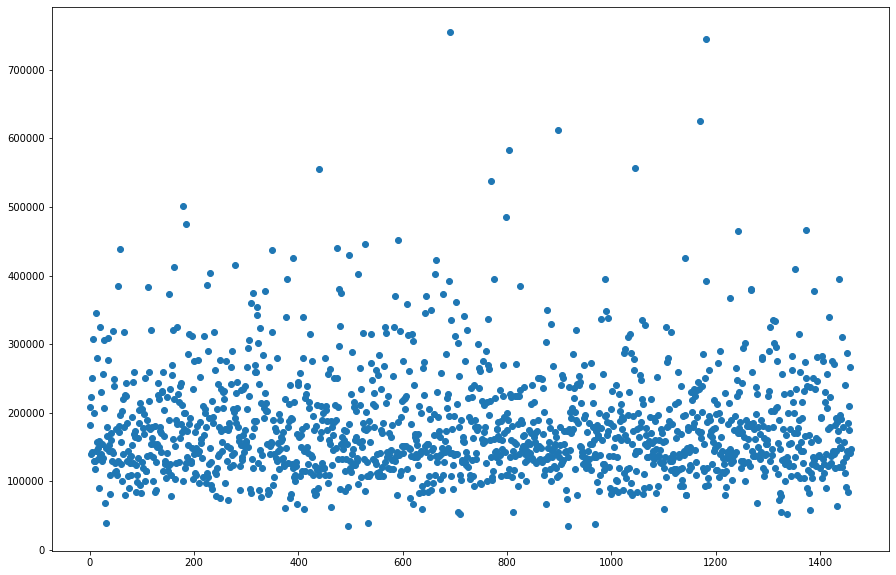

In [8]:
fig=plt.subplots(figsize=(15,10))
fig=plt.scatter(range(len(train_data)),train_data['SalePrice'])

We can see that the distribution of SalePrice across instances is random, there has been no extraordinary pattern in data collection

Now Let's do the correlation matrix

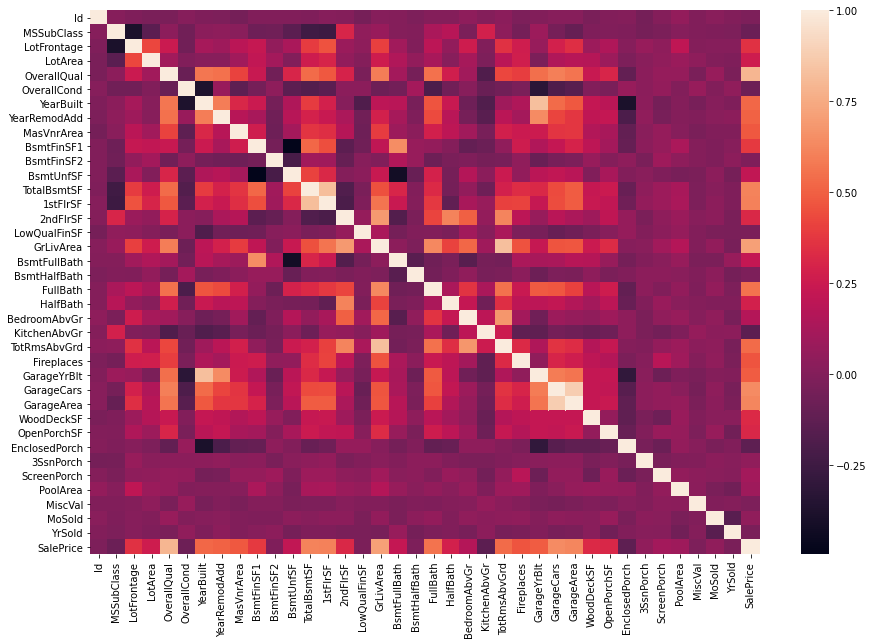

In [9]:
fig=plt.subplots(figsize=(15,10))
corr=train_data.corr()
fig=sns.heatmap(corr)

We can choose to focus only on the variables that have highest correlation with SalePrice.

In [10]:
k=15
corrmat=corr.nlargest(k,'SalePrice').index #this syntax will sort "SalePrice" column in "corr" and select k=15 largest values
corrmat

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

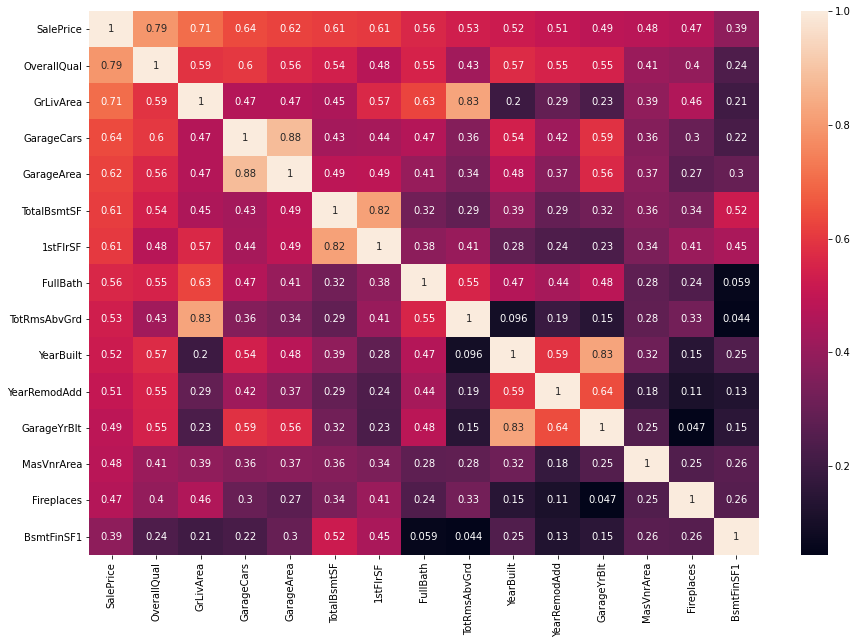

In [11]:
fig=plt.subplots(figsize=(15,10))
cm=train_data[corrmat].corr()
sns.heatmap(cm,yticklabels=corrmat.values,xticklabels=corrmat.values,annot=True)
plt.show()

According to this correlation matrix, we see that OverallQual and CrLivArea are 2 features that have high correlation with SalePrice

There are some points to consider

- GrLivArea has high correlation with TotRmsAbvGrd. Thus, I will choose to keep GrLivArea. It is intuitive that people might prefer having larger space to live rather than many small and congested rooms. In addition, information related to number of rooms is already incorporated in some features such as BedroomAbvGr, KitchenAbvGr. 
- GarageCars and Garage Area have high correlation and they seem to deliver similar information.
- TotalBsmtSF and 1stFlrSF also correlate strongly. Since they all point out the space of a house, I will analyze further features related to space such as GrLivArea, TotalBsmtSF... in order to explore more insights.
- It is understandable that GarageYrBlt and YearBuilt move at the same distance. It is probable that most houses have their Garage built at the same time of the whole building construction.

### 2. GrLivArea and related features <a class="anchor" id="GrLivArea"></a>

Let's first explore GrLivArea

Text(0, 0.5, 'SalePrice')

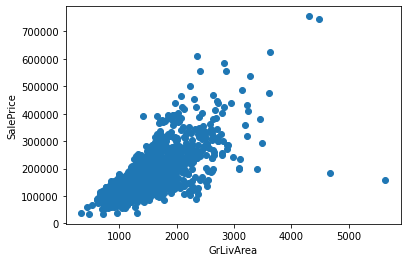

In [12]:
ax1=plt.scatter(train_data['GrLivArea'],train_data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

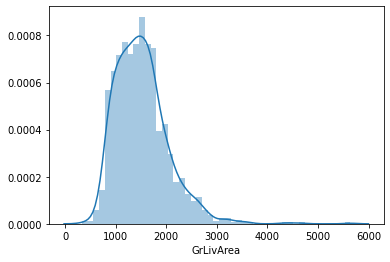

In [13]:
sns.distplot(train_data['GrLivArea'])
plt.show()

The distribution of GrLivArea is right skewed with 2 outliers on 4500-5500 m2. We can consider to use the log transformation or drop these 2 outliars

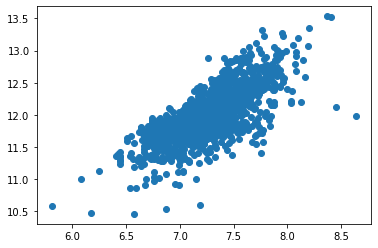

In [14]:
plt.scatter(np.log(train_data['GrLivArea']),np.log(train_data['SalePrice']))

There is a stronger dependence between SalePrice and GrLivArea when we take the log transformation of them. This fortifies our decision to use the log of SalePrice and GrLivArea for linear regression

We may also want to check if the test data has similar distribution with training data. Any abnormal difference will likely make our model unlikely to give satisfactory outcome

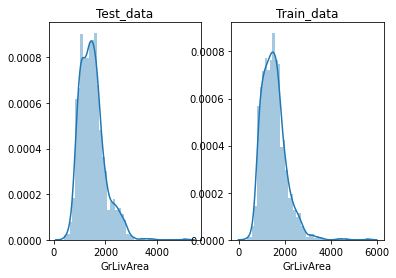

In [15]:
fig=plt.figure()

ax1=plt.subplot(121)

ax1=sns.distplot(test_data.GrLivArea)
ax1.set_title('Test_data')

ax2=plt.subplot(122)
ax2.set_title('Train_data')
ax2=sns.distplot(train_data.GrLivArea)

Now Let's analyze GrLivArea with other related features to derive new insights

In [16]:
df=train_data[['GrLivArea','TotRmsAbvGrd','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','SalePrice']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   TotRmsAbvGrd  1460 non-null   int64
 2   TotalBsmtSF   1460 non-null   int64
 3   1stFlrSF      1460 non-null   int64
 4   2ndFlrSF      1460 non-null   int64
 5   FullBath      1460 non-null   int64
 6   HalfBath      1460 non-null   int64
 7   BedroomAbvGr  1460 non-null   int64
 8   KitchenAbvGr  1460 non-null   int64
 9   SalePrice     1460 non-null   int64
dtypes: int64(10)
memory usage: 114.2 KB


In [17]:
dt=test_data[['GrLivArea','TotRmsAbvGrd','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr']]
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     1459 non-null   int64  
 1   TotRmsAbvGrd  1459 non-null   int64  
 2   TotalBsmtSF   1458 non-null   float64
 3   1stFlrSF      1459 non-null   int64  
 4   2ndFlrSF      1459 non-null   int64  
 5   FullBath      1459 non-null   int64  
 6   HalfBath      1459 non-null   int64  
 7   BedroomAbvGr  1459 non-null   int64  
 8   KitchenAbvGr  1459 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.7 KB


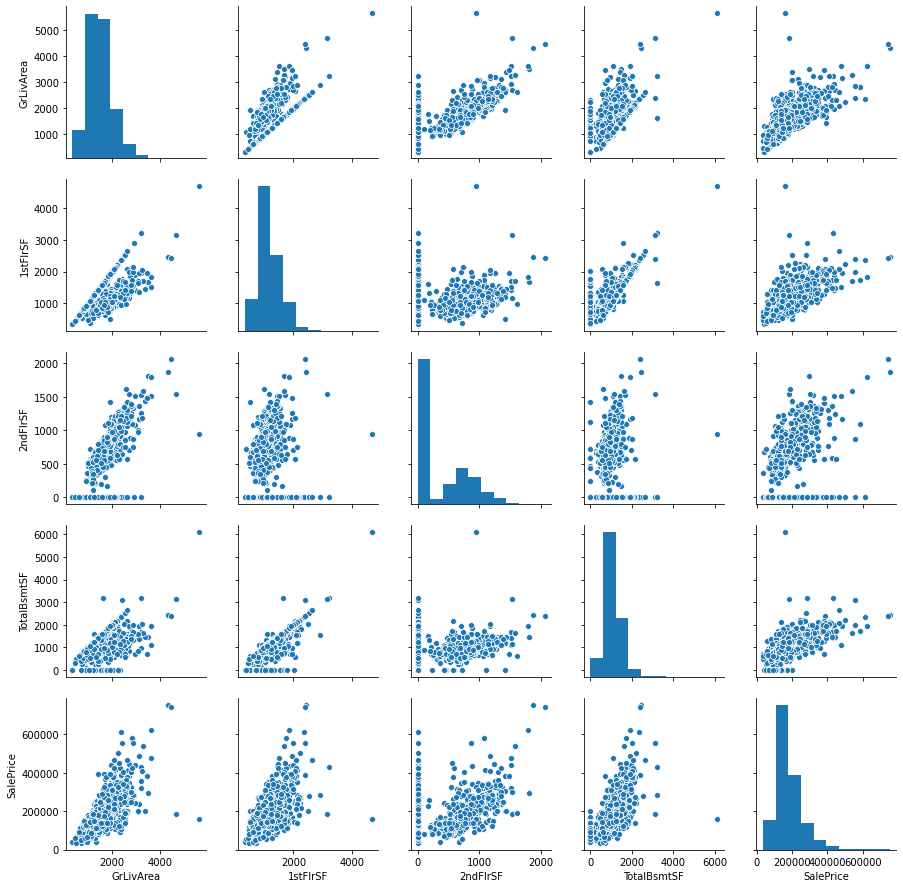

In [18]:
df_copy=df[['GrLivArea','1stFlrSF', '2ndFlrSF','TotalBsmtSF','SalePrice']]
sns.pairplot(df_copy)

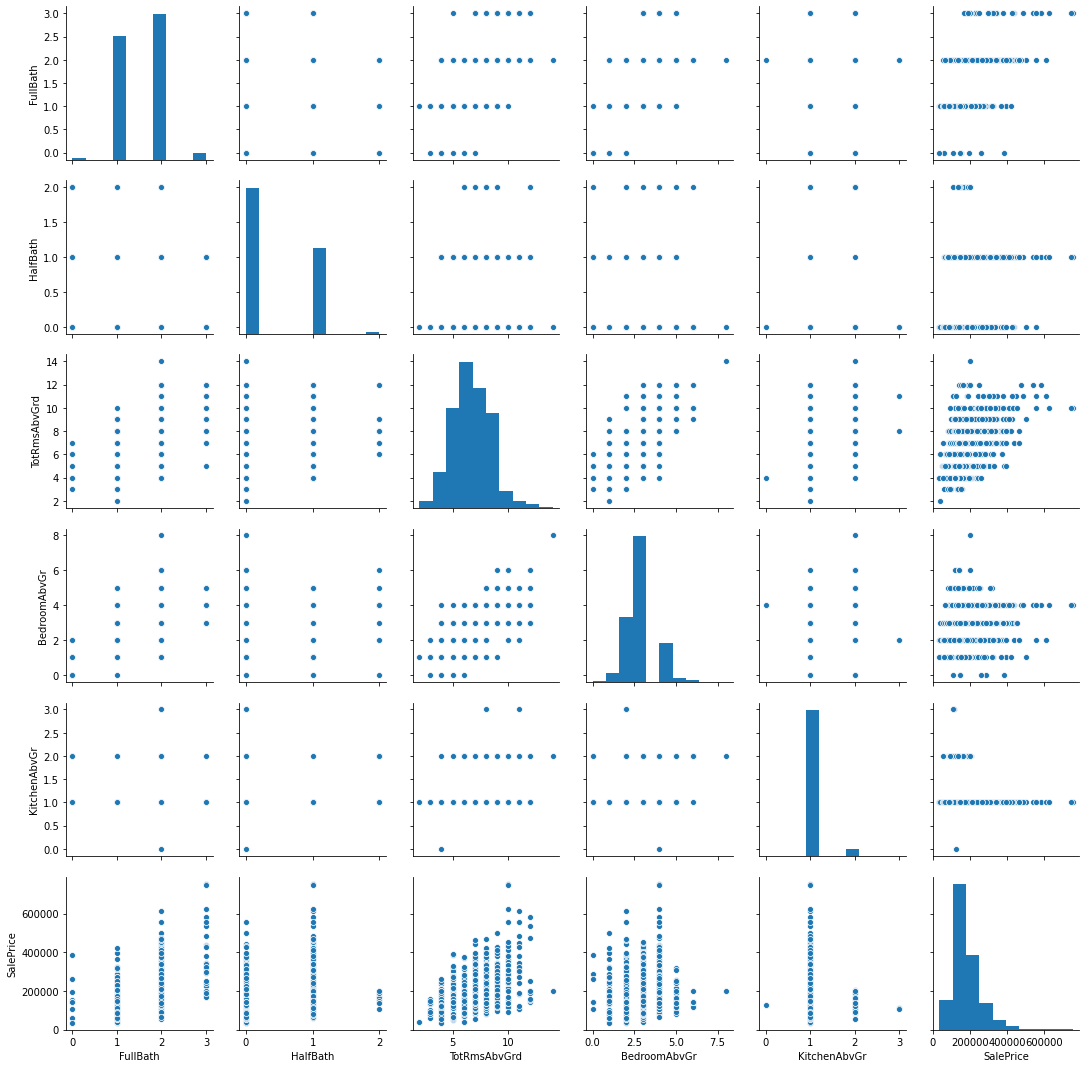

In [19]:
df_copy=df[['FullBath','HalfBath','TotRmsAbvGrd', 'BedroomAbvGr','KitchenAbvGr','SalePrice']]
sns.pairplot(df_copy)

We can generate a feature called as Average Space per Room to see how it correlates with SalePrice. This is based on the assumption that people prefer bigger rooms than many small & confined rooms


In [20]:
df['SpacePerRoom']=df['GrLivArea']/df['TotRmsAbvGrd']

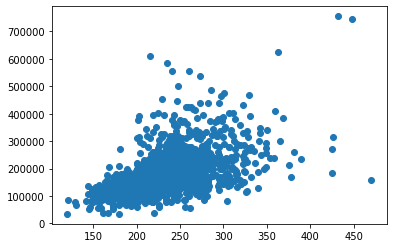

In [21]:
plt.scatter(df['SpacePerRoom'],train_data['SalePrice'])

In [22]:
df.corr()

,GrLivArea,TotRmsAbvGrd,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,SalePrice,SpacePerRoom
GrLivArea,1.000000,0.825489,0.454868,0.566024,0.687501,0.630012,0.415772,0.521270,0.100063,0.708624,0.653820
TotRmsAbvGrd,0.825489,1.000000,0.285573,0.409516,0.616423,0.554784,0.343415,0.676620,0.256045,0.533723,0.144031
TotalBsmtSF,0.454868,0.285573,1.000000,0.819530,-0.174512,0.323722,-0.048804,0.050450,-0.068901,0.613581,0.395858
1stFlrSF,0.566024,0.409516,0.819530,1.000000,-0.202646,0.380637,-0.119916,0.127401,0.068101,0.605852,0.438472
2ndFlrSF,0.687501,0.616423,-0.174512,-0.202646,1.000000,0.421378,0.609707,0.502901,0.059306,0.319334,0.392742
FullBath,0.630012,0.554784,0.323722,0.380637,0.421378,1.000000,0.136381,0.363252,0.133115,0.560664,0.402252
HalfBath,0.415772,0.343415,-0.048804,-0.119916,0.609707,0.136381,1.000000,0.226651,-0.068263,0.284108,0.296526
BedroomAbvGr,0.521270,0.676620,0.050450,0.127401,0.502901,0.363252,0.226651,1.000000,0.198597,0.168213,0.030601
KitchenAbvGr,0.100063,0.256045,-0.068901,0.068101,0.059306,0.133115,-0.068263,0.198597,1.000000,-0.135907,-0.110110
SalePrice,0.708624,0.533723,0.613581,0.605852,0.319334,0.560664,0.284108,0.168213,-0.135907,1.000000,0.540645


Using feature SpacePerRoom also results in lower correlation with GrLivArea than that of TotRmsAbvGrd, so I decided to keep this feature and drop the TotalRmsAbvGrd instead.

Regarding KitchenAbvGr, Half Bath and BedroomAbvGr, what I found is that house price does not increase in accordance with the increase in the number of rooms. As for Kitchen, it is apparent that houses with 1 kitchen have higher price.

Thus, to reduce the cardinality of data, I will create new features based on these variables by grouping unique values.

<AxesSubplot:xlabel='OneKitchen', ylabel='SalePrice'>

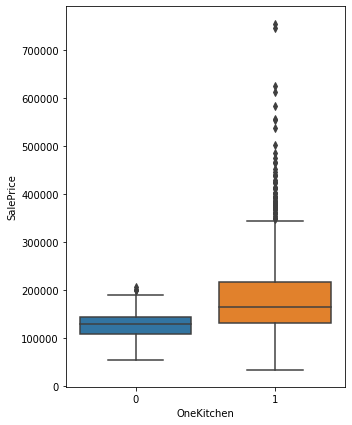

In [23]:
#Houses with 1 kitchen is labeled as 1 while the remainins are named 0
df['OneKitchen']=df.KitchenAbvGr.apply(lambda x:1 if x==1 else 0)
plt.figure(figsize=(5,7))
sns.boxplot(df.OneKitchen,df.SalePrice)

<AxesSubplot:xlabel='BelowFiveBedroom', ylabel='SalePrice'>

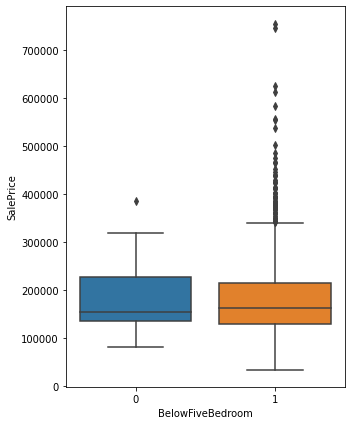

In [24]:
#Houses with 1 to 4 bedrooms are classified as 1
df['BelowFiveBedroom']=df.BedroomAbvGr.apply(lambda x:1 if 0<x<5 else 0)
plt.figure(figsize=(5,7))
sns.boxplot(df.BelowFiveBedroom,df.SalePrice)

<AxesSubplot:xlabel='OneHalfBath', ylabel='SalePrice'>

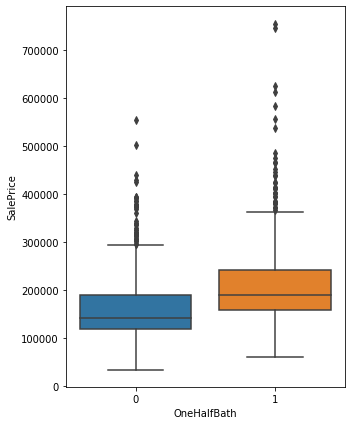

In [25]:
# Houses with 1 Half-Bathroom are labled as 1
df['OneHalfBath']=df.HalfBath.apply(lambda x:1 if x==1 else 0)
plt.figure(figsize=(5,7))
sns.boxplot(df.OneHalfBath,df.SalePrice)

The relationship between sales price and these features is now more obvious, with properties labeled as 1 having higher sales price

To sum up:

- We will keep GrLivArea, 1stFlrSF, 2ndFlrSF, FullBath, KitchenAbvGr.

- We will also add new features: SpacePerRoom, OneHalfBath, BelowFiveBedroom and OneKitchen

- We will drop TotRmsAbvGrd (highly correlates with GrLivArea).

- Keep both TotalBsmtSF and 1stFlrSF. Consider to drop after running models with feature selection such as Lasso Regression and RandomForest Regressor.

### 3. Garage and its related features 

In [26]:
df=train_data[['GarageCars','GarageArea','SalePrice']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   GarageCars  1460 non-null   int64
 1   GarageArea  1460 non-null   int64
 2   SalePrice   1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [27]:
dt=test_data[['GarageCars','GarageArea','GarageYrBlt']]
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GarageCars   1458 non-null   float64
 1   GarageArea   1458 non-null   float64
 2   GarageYrBlt  1381 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

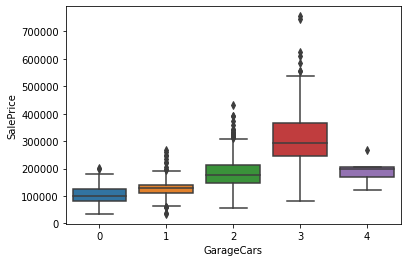

In [28]:
sns.boxplot(df['GarageCars'],df['SalePrice'])

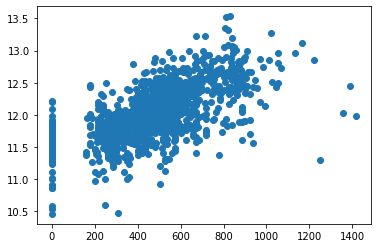

In [29]:
plt.scatter(df['GarageArea'],np.log1p(df['SalePrice']))

From my viewpoint, it is better to use feature GarageCars for faster model learning. It might be more sensible to predict how raising capacity of garage by 1 car, in lieu of by 1 m2, will impact the sales price. The price increase will be more noticeable from a 1-car to a 2 car-garage, rather than from a 100 m2-garage to a 101 m2-garage.

To bring linear relationship, we can generate a new feature, 1 for those having >=2 cars and 0 for those <2 cars.

In [30]:
def group(row):
    if row['GarageCars'] >=2:
        return 1
    else: 
        return 0
        
df['Carcount']=df.apply(group,axis=1)

In [31]:
#Another method is to use lambda function
#df['Car_count']=train_data['GarageCars'].apply(lambda x: 1 if x>=2 else 0)
#df.head(5)

In [32]:
df.groupby('Carcount')['SalePrice'].agg(np.median)

Carcount
0    125000
1    186600
Name: SalePrice, dtype: int64

In [33]:
df.groupby('Carcount')['SalePrice'].agg(np.mean)

Carcount
0    123652.795556
1    206436.819802
Name: SalePrice, dtype: float64

We can choose to drop "GarageCars" and "GarageArea" and keep "Car_Count" in regression

### 4. YearBuilt and related features

In [34]:
df=train_data[['YrSold','YearRemodAdd','YearBuilt','GarageYrBlt','SalePrice']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YrSold        1460 non-null   int64  
 1   YearRemodAdd  1460 non-null   int64  
 2   YearBuilt     1460 non-null   int64  
 3   GarageYrBlt   1379 non-null   float64
 4   SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 57.2 KB


<AxesSubplot:>

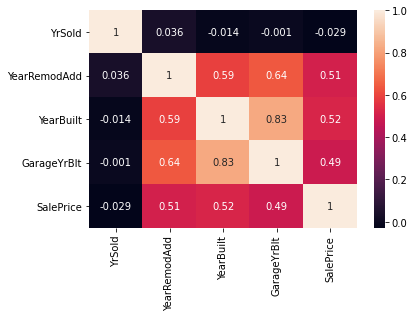

In [35]:
corr=df.corr()
sns.heatmap(corr,annot=True)

I will create an "Age" feature, indicating the Age of the Building. We can easily make an assumption that as the houses become aging, their sale prices will also decrease

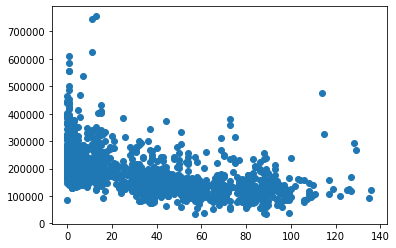

In [36]:
df['Age']=df.YrSold-df.YearBuilt
plt.scatter(df.Age,df.SalePrice)

I will also create a feature called RemodAge to measure the time since a house was remodeled until it was sold.

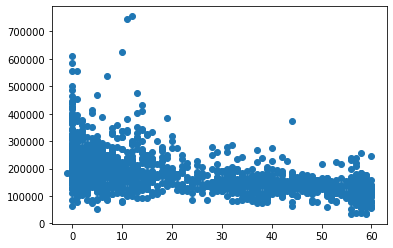

In [37]:
df['RemodAge']=df.YrSold-df.YearRemodAdd
plt.scatter(df.RemodAge,df.SalePrice)

<AxesSubplot:>

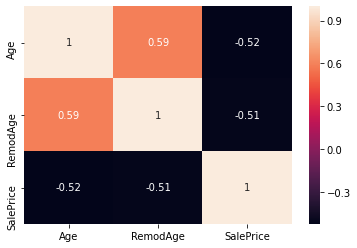

In [38]:
corr=df[['Age','RemodAge','SalePrice']].corr()
sns.heatmap(corr,annot=True)

Finally, I will drop YearBult, GarageYrBlt, YearRemodAdd and YearSold and only keep 2 Age variables

### 5. Handling Missing Values for Numeric Features

Before applying feature engineering we did before to train data, I would like to work with missing values and outliers first

In [39]:
total=train_data.loc[:,quantitative].isnull().sum()
percent=total/(train_data.isnull().count())
missing_df=pd.concat([total,percent],axis=1,keys=["Value","Percent"]).sort_values(by='Percent',ascending=False)
missing_df.loc[missing_df['Value']>0]

,Value,Percent
LotFrontage,259.0,0.177397
GarageYrBlt,81.0,0.055479
MasVnrArea,8.0,0.005479


In [40]:
test_quantitative=[f for f in quantitative if f !='SalePrice']
total_test=test_data.loc[:,test_quantitative].isnull().sum()
percent=total/(test_data.isnull().count())
missing_df=pd.concat([total,percent],axis=1,keys=["Value","Percent"]).sort_values(by='Percent',ascending=False)
missing_df.loc[missing_df['Value']>0]

,Value,Percent
LotFrontage,259.0,0.177519
GarageYrBlt,81.0,0.055517
MasVnrArea,8.0,0.005483


My principle is that those variables with more than 15% missing values will be eliminated completely

In [41]:
train_data.drop(missing_df.loc[missing_df.Percent > 0.15].index,axis=1,inplace=True)
test_data.drop(missing_df.loc[missing_df.Percent > 0.15].index,axis=1,inplace=True)

There are variables that are missing simply because of the nature. For example, if we check Garage, the variables related to Garage are missing some instances because these houses do not have any Garage

In [42]:
train_data.loc[train_data.GarageYrBlt.isnull(),'GarageCars'].sum()

0

Thus, I will impute NA values in GarageYrBlt with zero

In [43]:
train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna(0)
test_data['GarageYrBlt']=test_data['GarageYrBlt'].fillna(0)

In [44]:
train_data.GarageYrBlt.isnull().sum()

0

It is also likely that the null values for MasVnrArea result from the fact that the properties do not have Masonry veneer

In [45]:
train_data.loc[train_data.MasVnrArea.isnull(),['MasVnrType']]

,MasVnrType
234,NaN
529,NaN
650,NaN
936,NaN
973,NaN
977,NaN
1243,NaN
1278,NaN


In [46]:
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(0)
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(0)


Now let's apply the previous feature engineering methods into numeric values:

- We will keep GrLivArea, 1stFlrSF, 2ndFlrSF, FullBath, KitchenAbvGr.

- We will also add new features: SpacePerRoom, OneHalfBath, BelowFiveBedroom and OneKitchen

- We will drop TotRmsAbvGrd (highly correlates with GrLivArea).

- Keep both TotalBsmtSF and 1stFlrSF. Consider to drop after running models with feature selection such as Lasso Regression and RandomForest Regressor.

In [47]:
def numeric_transform(df):
    df['OneKitchen']=df['KitchenAbvGr'].apply(lambda x:1 if x==1 else 0)
    df['BelowFiveBedroom']=df.BedroomAbvGr.apply(lambda x:1 if 0<x<5 else 0)
    df['OneHalfBath']=df.HalfBath.apply(lambda x:1 if x==1 else 0)
    df['SpacePerRoom']=df['GrLivArea']/df['TotRmsAbvGrd']
    def group(row):
        if row['GarageCars'] >=2:
            return 1
        else: 
            return 0
        
    df['Carcount']=df.apply(group,axis=1)
    df['Age']=df.YrSold-df.YearBuilt
    df['RemodAge']=df.YrSold-df.YearRemodAdd
    
    return df


    
    

In [48]:
train_data=numeric_transform(train_data)

In [49]:
test_data=numeric_transform(test_data)

## 3. Categorical Variables  <a class="anchor" id="category"></a>

We will focus on ordinal features that are somehow related to the numeric features that are considered to be influential:

a) Ordinal variables
1. BsmtQual
2. GarageQual and GarageCond (consider if these 2 features are duplicate)
3. Utilities (I considered it to have high impact)
4. Functional (previously considered high impact)

b) Nominal variables

1. Neighborhood
2. SaleCondition
3. SaleType
4. MSZoning



### 1. Ordinal Variables 

In [50]:
ordinal_df=train_data[['Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC']]
ordinal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Utilities     1460 non-null   object
 1   LandSlope     1460 non-null   object
 2   ExterQual     1460 non-null   object
 3   ExterCond     1460 non-null   object
 4   BsmtQual      1423 non-null   object
 5   BsmtCond      1423 non-null   object
 6   BsmtExposure  1422 non-null   object
 7   BsmtFinType1  1423 non-null   object
 8   BsmtFinType2  1422 non-null   object
 9   HeatingQC     1460 non-null   object
 10  CentralAir    1460 non-null   object
 11  BsmtFullBath  1460 non-null   int64 
 12  BsmtHalfBath  1460 non-null   int64 
 13  KitchenQual   1460 non-null   object
 14  Functional    1460 non-null   object
 15  FireplaceQu   770 non-null    object
 16  GarageFinish  1379 non-null   object
 17  GarageQual    1379 non-null   object
 18  GarageCond    1379 non-null   object
 19  PavedD

In [51]:
ordinal_dt=test_data[['Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC']]
ordinal_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Utilities     1457 non-null   object 
 1   LandSlope     1459 non-null   object 
 2   ExterQual     1459 non-null   object 
 3   ExterCond     1459 non-null   object 
 4   BsmtQual      1415 non-null   object 
 5   BsmtCond      1414 non-null   object 
 6   BsmtExposure  1415 non-null   object 
 7   BsmtFinType1  1417 non-null   object 
 8   BsmtFinType2  1417 non-null   object 
 9   HeatingQC     1459 non-null   object 
 10  CentralAir    1459 non-null   object 
 11  BsmtFullBath  1457 non-null   float64
 12  BsmtHalfBath  1457 non-null   float64
 13  KitchenQual   1458 non-null   object 
 14  Functional    1457 non-null   object 
 15  FireplaceQu   729 non-null    object 
 16  GarageFinish  1381 non-null   object 
 17  GarageQual    1381 non-null   object 
 18  GarageCond    1381 non-null 

PoolQC and FireplaceQu will be eliminated from our dataset since they have many missing values.

Based on the variables understanding, I will encode the ordinal features using numeric scale. Higher number is assumed to increase sale price. 

In [52]:
ordinal_df = ordinal_df.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
    
    "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {'Fin':1,'RFn':0.8,'Unf':0.5,'No':0},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4},
                                "CentralAir":{"Y":1,"N":0}}
                     )

ordinal_df['SalePrice']=train_data['SalePrice']

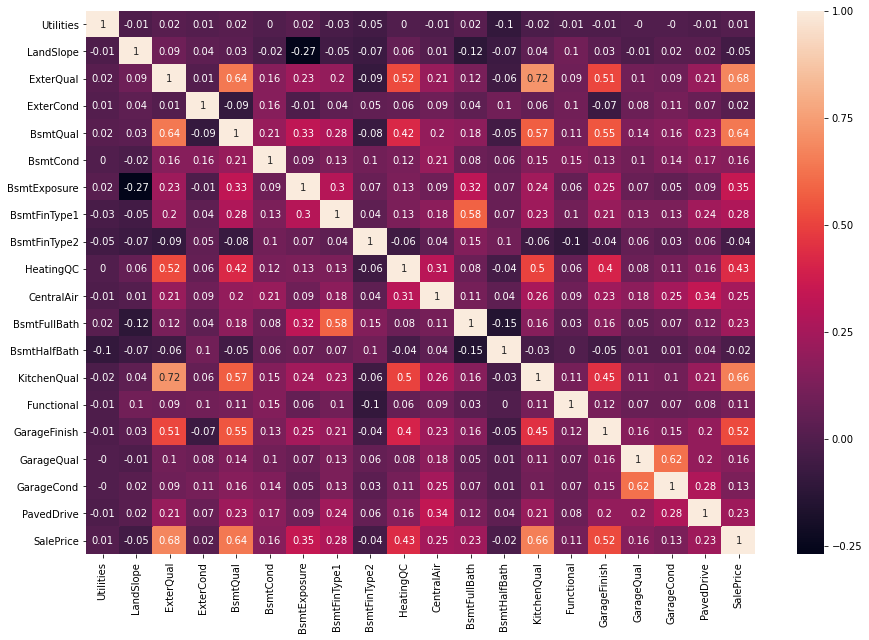

In [53]:
fig=plt.figure(figsize=(15,10))
ordinal_cor=pd.DataFrame(np.round(ordinal_df.corr(),2))
#ordinal_cor=ordinal_cor.sort_values(by='SalePrice',ascending=False)
fig=sns.heatmap(ordinal_cor,annot=True)


It is interesting to see that the variables related to "Qual" (Quality) have high impact to SalePrice

In [54]:
ordinal=[f for f in ordinal_df.columns if f != 'SalePrice']
tr=pd.melt(ordinal_df,value_vars=ordinal,id_vars='SalePrice')
tr

,SalePrice,variable,value
0,208500,Utilities,4
1,181500,Utilities,4
2,223500,Utilities,4
3,140000,Utilities,4
4,250000,Utilities,4
...,...,...,...
30655,175000,PoolQC,NaN
30656,210000,PoolQC,NaN
30657,266500,PoolQC,NaN
30658,142125,PoolQC,NaN


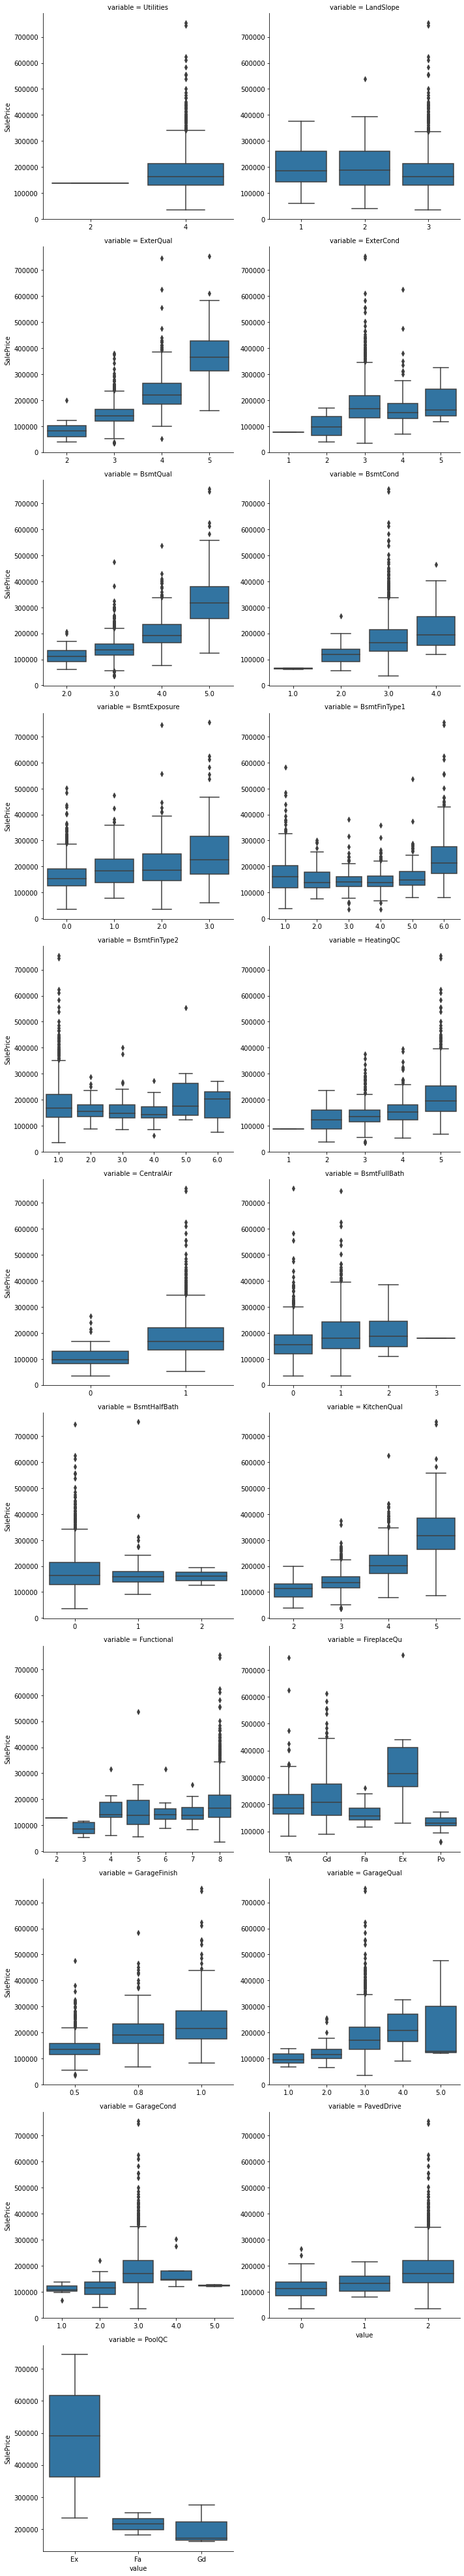

In [55]:
draw=sns.FacetGrid(tr,col='variable',col_wrap=2,sharex=False,sharey=False,size=5)
draw.map(sns.boxplot,'value','SalePrice')


Throught the chart, I decide to drop Utilities since almost all variables are "AllPub". It cannot give us any insight

In [56]:
train_data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

I will also drop GarageCond since it highly correlates with GarageQual and has little  impact to SalePrice

In [57]:
train_data.drop(['GarageCond','Utilities'],axis=1,inplace=True)
test_data.drop(['GarageCond','Utilities'],axis=1,inplace=True)

### 2. Nominal variables 

In [58]:
ct_train=train_data[['SalePrice','Neighborhood','MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','LotConfig','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','MiscFeature','SaleType','SaleCondition','Fence']]
ct_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   Neighborhood   1460 non-null   object
 2   MSSubClass     1460 non-null   int64 
 3   MSZoning       1460 non-null   object
 4   Street         1460 non-null   object
 5   Alley          91 non-null     object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  Foundation     1460 non-null

In [59]:
ct_test=test_data[['Neighborhood','MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','LotConfig','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','MiscFeature','SaleType','SaleCondition','Fence']]
ct_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Neighborhood   1459 non-null   object
 1   MSSubClass     1459 non-null   int64 
 2   MSZoning       1455 non-null   object
 3   Street         1459 non-null   object
 4   Alley          107 non-null    object
 5   LotShape       1459 non-null   object
 6   LandContour    1459 non-null   object
 7   LotConfig      1459 non-null   object
 8   Condition1     1459 non-null   object
 9   Condition2     1459 non-null   object
 10  BldgType       1459 non-null   object
 11  HouseStyle     1459 non-null   object
 12  RoofStyle      1459 non-null   object
 13  RoofMatl       1459 non-null   object
 14  Exterior1st    1458 non-null   object
 15  Exterior2nd    1458 non-null   object
 16  MasVnrType     1443 non-null   object
 17  Foundation     1459 non-null   object
 18  Heating        1459 non-null

I decide to drop MiscFeature and Alley since they have many missing values in both dataset

In [60]:
ct_train.drop(['MiscFeature','Alley'],axis=1,inplace=True)


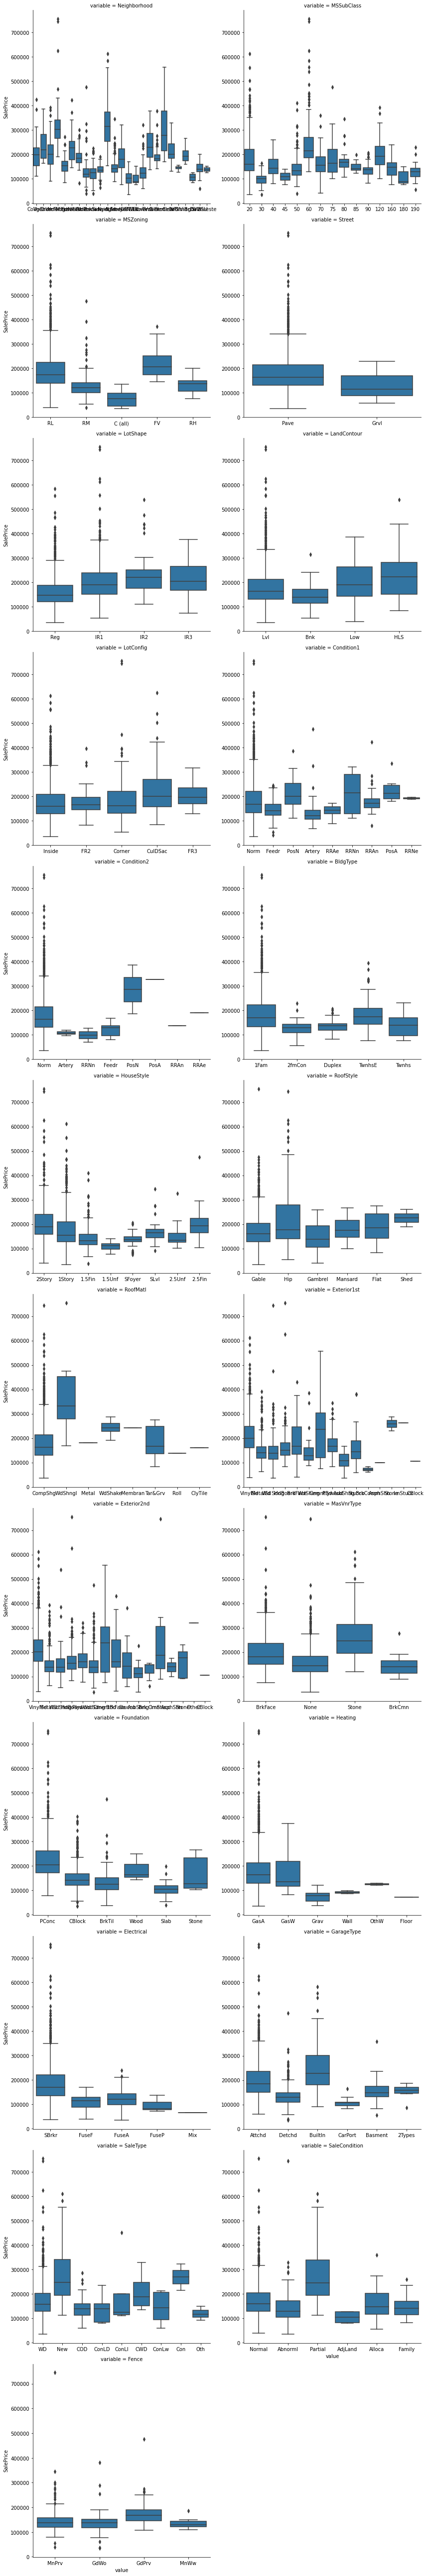

In [61]:
f=[f for f in ct_train.columns if f != "SalePrice"]
tr=pd.melt(ct_train,id_vars='SalePrice',value_vars=f)
draw=sns.FacetGrid(tr,col='variable',col_wrap=2,sharex=False,sharey=False,size=6)
draw.map(sns.boxplot,"value",'SalePrice')

In [62]:
#Have a look at the data cardinality in each nominal variables  
for var in ct_train.columns:
    print( var,"has",len(ct_train[var].unique()),"unique values")

SalePrice has 663 unique values
Neighborhood has 25 unique values
MSSubClass has 15 unique values
MSZoning has 5 unique values
Street has 2 unique values
LotShape has 4 unique values
LandContour has 4 unique values
LotConfig has 5 unique values
Condition1 has 9 unique values
Condition2 has 8 unique values
BldgType has 5 unique values
HouseStyle has 8 unique values
RoofStyle has 6 unique values
RoofMatl has 8 unique values
Exterior1st has 15 unique values
Exterior2nd has 16 unique values
MasVnrType has 5 unique values
Foundation has 6 unique values
Heating has 6 unique values
Electrical has 6 unique values
GarageType has 7 unique values
SaleType has 9 unique values
SaleCondition has 6 unique values
Fence has 5 unique values


There are different methods to encode nominal variables. 
The most popular ones are Label Encoder and One Hot Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder
LBE=LabelEncoder()
ct_train['SaleCondition_E']=LBE.fit_transform(ct_train['SaleCondition'])
exp=ct_train[['SaleCondition','SaleCondition_E']]
exp.index=exp['SaleCondition']
exp['SaleCondition_E'].to_dict()

{'Normal': 4,
 'Abnorml': 0,
 'Partial': 5,
 'AdjLand': 1,
 'Alloca': 2,
 'Family': 3}

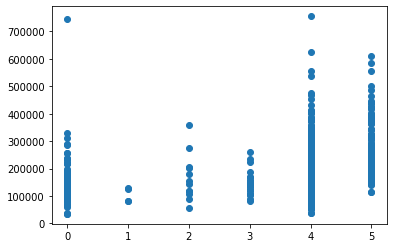

In [64]:
plt.scatter(ct_train['SaleCondition_E'],ct_train['SalePrice'])

As we can see here, LabelEncode encode the variables very arbitrarily.
Since we have some varibles with relatively high cardinality such as Neighborhood, it is also not sensible to use OneHot Encoding, which creates huge number of columns.


There are other alternative method to encode, namely Target Encoding. This time I will try encode the variable based on order of its mean

In [65]:
def encode(frame,feature):
    ordering=pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    order=ordering['ordering'].to_dict()
    for cat,o in order.items():
        frame.loc[frame[feature]==cat, feature +'_Encode']=o
    


In [66]:
category=['Neighborhood','MSSubClass','MSZoning','Street','LotShape','LandContour','LotConfig','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','SaleType','SaleCondition']

In [67]:
for q in category:
     encode(ct_train,q)

In [68]:
med=ct_train[['Neighborhood','Neighborhood_Encode']]
med.set_index('Neighborhood',inplace=True)
med['Neighborhood_Encode'].to_dict()

{'CollgCr': 17.0,
 'Veenker': 21.0,
 'Crawfor': 18.0,
 'NoRidge': 25.0,
 'Mitchel': 12.0,
 'Somerst': 20.0,
 'NWAmes': 14.0,
 'OldTown': 6.0,
 'BrkSide': 4.0,
 'Sawyer': 7.0,
 'NridgHt': 24.0,
 'NAmes': 11.0,
 'SawyerW': 13.0,
 'IDOTRR': 2.0,
 'MeadowV': 1.0,
 'Edwards': 5.0,
 'Timber': 22.0,
 'Gilbert': 15.0,
 'StoneBr': 23.0,
 'ClearCr': 19.0,
 'NPkVill': 10.0,
 'Blmngtn': 16.0,
 'BrDale': 3.0,
 'SWISU': 9.0,
 'Blueste': 8.0}

<AxesSubplot:xlabel='GarageType_Encode', ylabel='SalePrice'>

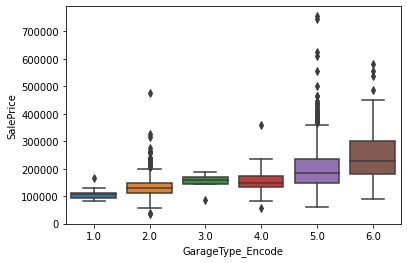

In [69]:
sns.boxplot(ct_train['GarageType_Encode'],ct_train['SalePrice'])

I will also encode test data using this method 

In [70]:
def test_encode(train_frame,test_frame,feature):
    ordering=pd.DataFrame()
    ordering['val'] = train_frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = train_frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    order=ordering['ordering'].to_dict()
    for cat,o in order.items():
        test_frame.loc[test_frame[feature]==cat, feature +'_Encode']=o

###  3. Handling Missing Values and Data Transformation

Just like numeric variables, I will resolve missing values before performing features transformation

In [71]:
total=train_data.isnull().sum()
percent=total/(train_data.isnull().count())
missing_df=pd.concat([total,percent],axis=1,keys=["Value","Percent"]).sort_values(by='Percent',ascending=False)
missing_df.loc[missing_df['Value']>0]

,Value,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027


In [72]:
total=test_data.isnull().sum()
percent=total/(test_data.isnull().count())
missing_df=pd.concat([total,percent],axis=1,keys=["Value","Percent"]).sort_values(by='Percent',ascending=False)
missing_df.loc[missing_df['Value']>0]

,Value,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageType,76,0.052090
BsmtCond,45,0.030843
BsmtQual,44,0.030158


In both dataset, we have considerable number of missing values for Fence, Pool Quality, Alley and MiscFeature. Hence, there is no reason why we should not drop these features

In [73]:
train_data.drop(missing_df.loc[missing_df.Percent > 0.15].index,axis=1,inplace=True)
test_data.drop(missing_df.loc[missing_df.Percent > 0.15].index,axis=1,inplace=True)

Just as we discussed in Numeric Features section. Some missing values are inherently zero.

In [74]:
train_data[['GarageCars','GarageType','GarageQual','GarageFinish']].loc[train_data['GarageQual'].isnull()].head(20)

,GarageCars,GarageType,GarageQual,GarageFinish
39,0,NaN,NaN,NaN
48,0,NaN,NaN,NaN
78,0,NaN,NaN,NaN
88,0,NaN,NaN,NaN
89,0,NaN,NaN,NaN
99,0,NaN,NaN,NaN
108,0,NaN,NaN,NaN
125,0,NaN,NaN,NaN
127,0,NaN,NaN,NaN
140,0,NaN,NaN,NaN


In [75]:
train_data[['GarageType','GarageQual','GarageFinish']]=train_data[['GarageType','GarageQual','GarageFinish']].fillna('No')
test_data[['GarageType','GarageQual','GarageFinish']]=test_data[['GarageType','GarageQual','GarageFinish']].fillna('No')


Similar situation is for variables related to Basement

In [76]:
train_data[['TotalBsmtSF','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']].loc[train_data['BsmtCond'].isnull()].head(20)

,TotalBsmtSF,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual
17,0,NaN,NaN,NaN,NaN,NaN
39,0,NaN,NaN,NaN,NaN,NaN
90,0,NaN,NaN,NaN,NaN,NaN
102,0,NaN,NaN,NaN,NaN,NaN
156,0,NaN,NaN,NaN,NaN,NaN
182,0,NaN,NaN,NaN,NaN,NaN
259,0,NaN,NaN,NaN,NaN,NaN
342,0,NaN,NaN,NaN,NaN,NaN
362,0,NaN,NaN,NaN,NaN,NaN
371,0,NaN,NaN,NaN,NaN,NaN


In [77]:
train_data[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']]=train_data[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']].fillna('No')
test_data[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']]=test_data[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']].fillna('No')

In [78]:
train_data['MasVnrType']=train_data['MasVnrType'].fillna('None')
test_data['MasVnrType']=test_data['MasVnrType'].fillna('None')


In [79]:
total=train_data.isnull().sum()
percent=total/(train_data.isnull().count())
missing_df=pd.concat([total,percent],axis=1,keys=["Value","Percent"]).sort_values(by='Percent',ascending=False)
missing_df.loc[missing_df['Value']>0]

,Value,Percent
Electrical,1,0.000685


The remaining missing value in Electrical will be filled with mode

In [80]:
train_data['Electrical']=train_data['Electrical'].fillna(train_data.Electrical.mode()[0])

For simplicity, I will also fill the missing values in test dataset with mode as well

In [81]:
total=test_data.isnull().sum()
percent=total/(test_data.isnull().count())
missing_df=pd.concat([total,percent],axis=1,keys=["Value","Percent"]).sort_values(by='Percent',ascending=False)
missing_df.loc[missing_df['Value']>0]

,Value,Percent
MSZoning,4,0.002742
BsmtFullBath,2,0.001371
BsmtHalfBath,2,0.001371
Functional,2,0.001371
Exterior1st,1,0.000685
KitchenQual,1,0.000685
TotalBsmtSF,1,0.000685
BsmtUnfSF,1,0.000685
BsmtFinSF2,1,0.000685
BsmtFinSF1,1,0.000685


In [82]:
for q in missing_df.index:
    i=test_data[q].mode()[0]
    test_data[q]=test_data[q].fillna(i)

Now let's perform final part of the feature transformation

In [83]:
#replace ordinal variables with numbers
train_data= train_data.replace({"BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
    
    "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageFinish": {'Fin':1,'RFn':0.8,'Unf':0.5,'No':0},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                                                      "CentralAir":{"Y":1,"N":0}}
                     )

train_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,SaleType,SaleCondition,SalePrice,OneKitchen,BelowFiveBedroom,OneHalfBath,SpacePerRoom,Carcount,Age,RemodAge
0,1,60,RL,8450,2,4,Lvl,Inside,3,CollgCr,...,WD,Normal,208500,1,1,1,213.750000,1,5,5
1,2,20,RL,9600,2,4,Lvl,FR2,3,Veenker,...,WD,Normal,181500,1,1,0,210.333333,1,31,31
2,3,60,RL,11250,2,3,Lvl,Inside,3,CollgCr,...,WD,Normal,223500,1,1,1,297.666667,1,7,6
3,4,70,RL,9550,2,3,Lvl,Corner,3,Crawfor,...,WD,Abnorml,140000,1,1,0,245.285714,1,91,36
4,5,60,RL,14260,2,3,Lvl,FR2,3,NoRidge,...,WD,Normal,250000,1,1,1,244.222222,1,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,2,4,Lvl,Inside,3,Gilbert,...,WD,Normal,175000,1,1,1,235.285714,1,8,7
1456,1457,20,RL,13175,2,4,Lvl,Inside,3,NWAmes,...,WD,Normal,210000,1,1,0,296.142857,1,32,22
1457,1458,70,RL,9042,2,4,Lvl,Inside,3,Crawfor,...,WD,Normal,266500,1,1,0,260.000000,0,69,4
1458,1459,20,RL,9717,2,4,Lvl,Inside,3,NAmes,...,WD,Normal,142125,1,1,0,215.600000,0,60,14


In [84]:
#replace ordinal variables with numbers
test_data= test_data.replace({"BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
    
    "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageFinish": {'Fin':1,'RFn':0.8,'Unf':0.5,'No':0},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                                                      "CentralAir":{"Y":1,"N":0}}
                     )

test_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,YrSold,SaleType,SaleCondition,OneKitchen,BelowFiveBedroom,OneHalfBath,SpacePerRoom,Carcount,Age,RemodAge
0,1461,20,RH,11622,2,4,Lvl,Inside,3,NAmes,...,2010,WD,Normal,1,1,0,179.200000,0,49,49
1,1462,20,RL,14267,2,3,Lvl,Corner,3,NAmes,...,2010,WD,Normal,1,1,1,221.500000,0,52,52
2,1463,60,RL,13830,2,3,Lvl,Inside,3,Gilbert,...,2010,WD,Normal,1,1,1,271.500000,1,13,12
3,1464,60,RL,9978,2,3,Lvl,Inside,3,Gilbert,...,2010,WD,Normal,1,1,1,229.142857,1,12,12
4,1465,120,RL,5005,2,3,HLS,Inside,3,StoneBr,...,2010,WD,Normal,1,1,0,256.000000,1,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,2,4,Lvl,Inside,3,MeadowV,...,2006,WD,Normal,1,1,1,218.400000,0,36,36
1455,2916,160,RM,1894,2,4,Lvl,Inside,3,MeadowV,...,2006,WD,Abnorml,1,1,1,182.000000,0,36,36
1456,2917,20,RL,20000,2,4,Lvl,Inside,3,Mitchel,...,2006,WD,Abnorml,1,1,0,174.857143,1,46,10
1457,2918,85,RL,10441,2,4,Lvl,Inside,3,Mitchel,...,2006,WD,Normal,1,1,0,161.666667,0,14,14


In [85]:
category=['Neighborhood','MSSubClass','MSZoning','Street','LotShape','LandContour','LotConfig','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','SaleType','SaleCondition']

In [86]:
for q in category:
     encode(train_data,q)

In [87]:
test_data

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,YrSold,SaleType,SaleCondition,OneKitchen,BelowFiveBedroom,OneHalfBath,SpacePerRoom,Carcount,Age,RemodAge
0,1461,20,RH,11622,2,4,Lvl,Inside,3,NAmes,...,2010,WD,Normal,1,1,0,179.200000,0,49,49
1,1462,20,RL,14267,2,3,Lvl,Corner,3,NAmes,...,2010,WD,Normal,1,1,1,221.500000,0,52,52
2,1463,60,RL,13830,2,3,Lvl,Inside,3,Gilbert,...,2010,WD,Normal,1,1,1,271.500000,1,13,12
3,1464,60,RL,9978,2,3,Lvl,Inside,3,Gilbert,...,2010,WD,Normal,1,1,1,229.142857,1,12,12
4,1465,120,RL,5005,2,3,HLS,Inside,3,StoneBr,...,2010,WD,Normal,1,1,0,256.000000,1,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,2,4,Lvl,Inside,3,MeadowV,...,2006,WD,Normal,1,1,1,218.400000,0,36,36
1455,2916,160,RM,1894,2,4,Lvl,Inside,3,MeadowV,...,2006,WD,Abnorml,1,1,1,182.000000,0,36,36
1456,2917,20,RL,20000,2,4,Lvl,Inside,3,Mitchel,...,2006,WD,Abnorml,1,1,0,174.857143,1,46,10
1457,2918,85,RL,10441,2,4,Lvl,Inside,3,Mitchel,...,2006,WD,Normal,1,1,0,161.666667,0,14,14


In [88]:
for q in category:
     test_encode(train_data,test_data,q)

In [89]:
train_data.drop(category,inplace=True,axis=1)
train_data

,Id,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,RoofMatl_Encode,Exterior1st_Encode,Exterior2nd_Encode,MasVnrType_Encode,Foundation_Encode,Heating_Encode,Electrical_Encode,GarageType_Encode,SaleType_Encode,SaleCondition_Encode
0,1,8450,3,7,5,2003,2003,196.0,4,3,...,3.0,12.0,13.0,3.0,6.0,6.0,5.0,6.0,5.0,5.0
1,2,9600,3,6,8,1976,1976,0.0,3,3,...,3.0,5.0,6.0,2.0,3.0,6.0,5.0,6.0,5.0,5.0
2,3,11250,3,7,5,2001,2002,162.0,4,3,...,3.0,12.0,13.0,3.0,6.0,6.0,5.0,6.0,5.0,5.0
3,4,9550,3,7,5,1915,1970,0.0,3,3,...,3.0,6.0,9.0,2.0,2.0,6.0,5.0,3.0,5.0,2.0
4,5,14260,3,8,5,2000,2000,350.0,4,3,...,3.0,12.0,13.0,3.0,6.0,6.0,5.0,6.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,3,6,5,1999,2000,0.0,3,3,...,3.0,12.0,13.0,2.0,6.0,6.0,5.0,6.0,5.0,5.0
1456,1457,13175,3,6,6,1978,1988,119.0,3,3,...,3.0,10.0,11.0,4.0,3.0,6.0,5.0,6.0,5.0,5.0
1457,1458,9042,3,7,9,1941,2006,0.0,5,4,...,3.0,13.0,14.0,2.0,4.0,6.0,5.0,6.0,5.0,5.0
1458,1459,9717,3,5,6,1950,1996,0.0,3,3,...,3.0,5.0,6.0,2.0,3.0,6.0,4.0,6.0,5.0,5.0


In [90]:
test_data.drop(category,inplace=True,axis=1)
test_data

,Id,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,RoofMatl_Encode,Exterior1st_Encode,Exterior2nd_Encode,MasVnrType_Encode,Foundation_Encode,Heating_Encode,Electrical_Encode,GarageType_Encode,SaleType_Encode,SaleCondition_Encode
0,1461,11622,3,5,6,1961,1961,0.0,3,3,...,3.0,12.0,13.0,2.0,3.0,6.0,5.0,6.0,5.0,5.0
1,1462,14267,3,6,6,1958,1958,108.0,3,3,...,3.0,6.0,5.0,3.0,3.0,6.0,5.0,6.0,5.0,5.0
2,1463,13830,3,5,5,1997,1998,0.0,3,3,...,3.0,12.0,13.0,2.0,6.0,6.0,5.0,6.0,5.0,5.0
3,1464,9978,3,6,6,1998,1998,20.0,3,3,...,3.0,12.0,13.0,3.0,6.0,6.0,5.0,6.0,5.0,5.0
4,1465,5005,3,8,5,1992,1992,0.0,4,3,...,3.0,9.0,10.0,2.0,6.0,6.0,5.0,6.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,1936,3,4,7,1970,1970,0.0,3,3,...,3.0,13.0,14.0,2.0,3.0,6.0,5.0,1.0,5.0,5.0
1455,2916,1894,3,4,5,1970,1970,0.0,3,3,...,3.0,13.0,14.0,2.0,3.0,6.0,5.0,2.0,5.0,2.0
1456,2917,20000,3,5,7,1960,1996,0.0,3,3,...,3.0,12.0,13.0,2.0,3.0,6.0,5.0,3.0,5.0,2.0
1457,2918,10441,3,5,5,1992,1992,0.0,3,3,...,3.0,9.0,9.0,2.0,6.0,6.0,5.0,1.0,5.0,5.0


In [91]:
train_data.columns

Index(['Id', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'OneKitchen', 'BelowFiveBedroom',
       'OneHalfBath', 'SpacePerRoom', 'Carcount', 'Age', 'RemodAge',
       'Neighborhood_Encode', 'MSSubClass_Encode', 'MSZoning_Encode',
       'Street_Encode', 'LotShape_Encode', 'LandC

There are also other variables that we will not use, e.g. ID, YearBuilt and TotRmsAbvGr


In [92]:
to_drop=['Id','YearBuilt','YearRemodAdd','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageYrBlt','GarageCars','GarageArea','YrSold']

In [93]:
train_data.drop(to_drop,inplace=True,axis=1)
test_data.drop(to_drop,inplace=True,axis=1)

## 4. Testing for Normality  <a class="anchor" id="normality"></a>

I choose to perform log transformation for variables that have abs(skewness) > 0.5 to ensure normality for the modelling.

Usually 0.5 is the least level for moderate skew. Any distribution having |skewness| > 1 is highly skewed 

In [94]:
quantitative_train=[f for f in train_data.columns if f in quantitative]

In [95]:
quantitative_df=pd.DataFrame()
for i in quantitative_train:
    quantitative_df[i]=train_data[i]

In [96]:
quantitative_df.skew(axis=0).sort_values(ascending=False)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.677616
OpenPorchSF       2.364342
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
FullBath          0.036562
dtype: float64

There are some variables that have very high skewness. LEt's explore them before doing further transformation

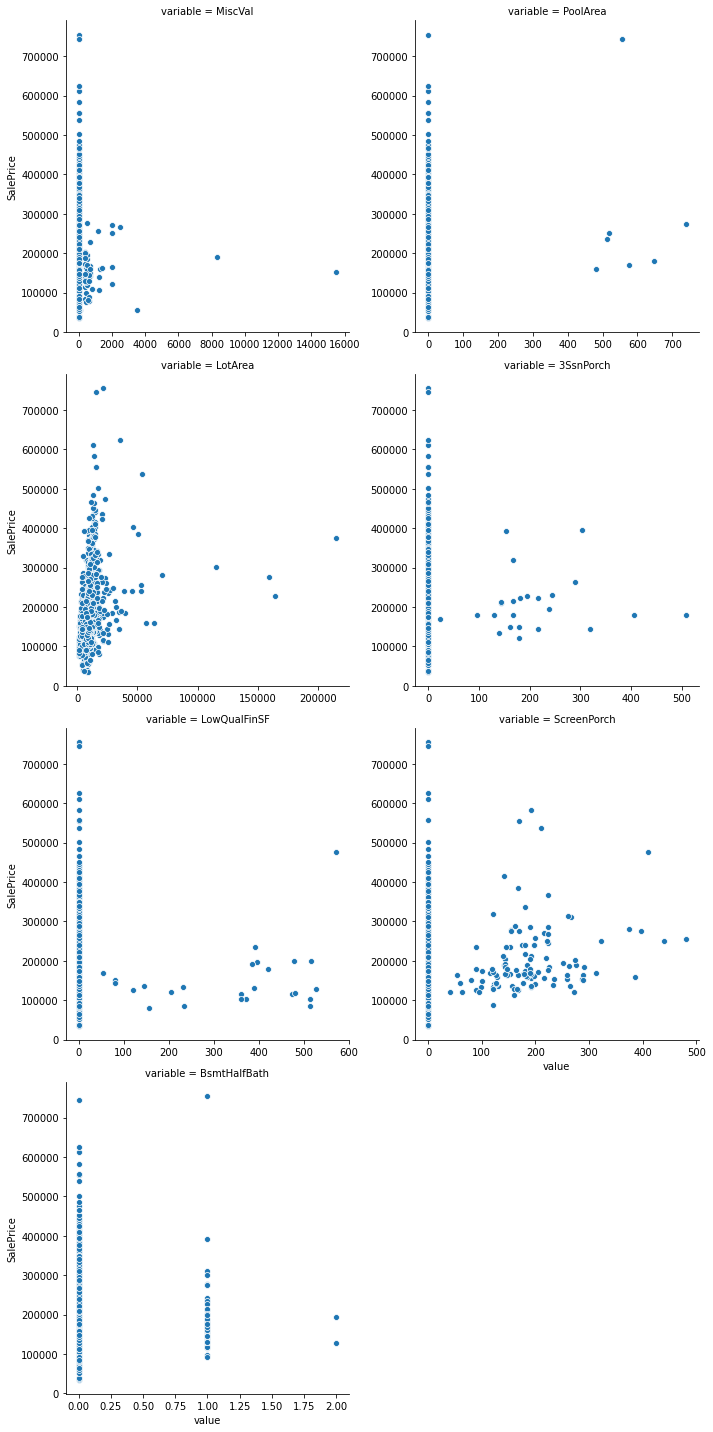

In [97]:

var=['MiscVal','PoolArea','LotArea','3SsnPorch','LowQualFinSF','ScreenPorch','BsmtHalfBath']
skewness=pd.melt(train_data,id_vars='SalePrice',value_vars=var)
draw=sns.FacetGrid(skewness,col='variable',col_wrap=2,size=5,sharex=False,sharey=False)
#draw.map(plt.hist,"value",bins=10)
draw.map(sns.scatterplot,"value",'SalePrice')

From the visualization, we can see that PoolArea, MiscVal, 3SsnPorch, LowQualSF has high number of zero value. In addition, they do not show any linearity or pattern of trend over SalePrice.

Thus, I decide to eliminate them from my model

In [98]:
train_data.drop(['PoolArea','MiscVal', '3SsnPorch', 'LowQualFinSF'],axis=1,inplace=True)
test_data.drop(['PoolArea','MiscVal', '3SsnPorch', 'LowQualFinSF'],axis=1,inplace=True)

In [99]:
quantitative_train=[f for f in train_data.columns if f in quantitative]
quantitative_df=pd.DataFrame()
for i in quantitative_train:
    quantitative_df[i]=train_data[i]
quantitative_df.skew(axis=0).sort_values(ascending=False)


LotArea          12.207688
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.677616
OpenPorchSF       2.364342
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
FullBath          0.036562
dtype: float64

In [100]:
to_skew=['LotArea','BsmtFinSF2','ScreenPorch','EnclosedPorch','OpenPorchSF','BsmtFinSF1','WoodDeckSF','TotalBsmtSF','1stFlrSF','GrLivArea','BsmtUnfSF','2ndFlrSF','Fireplaces','BsmtFullBath']

In [101]:
for i in to_skew:
    train_data[i]=np.log1p(train_data[i])
    test_data[i]=np.log1p(test_data[i])
    

In [102]:
total=train_data.isnull().sum()
percent=total/(train_data.isnull().count())
missing_df=pd.concat([total,percent],axis=1,keys=["Value","Percent"]).sort_values(by='Percent',ascending=False)
missing_df.loc[missing_df['Value']>0]

,Value,Percent


In [103]:
total=test_data.isnull().sum()
percent=total/(test_data.isnull().count())
missing_df=pd.concat([total,percent],axis=1,keys=["Value","Percent"]).sort_values(by='Percent',ascending=False)
missing_df.loc[missing_df['Value']>0]

,Value,Percent
MSSubClass_Encode,1,0.000685


We can realize that there is a null value in MSSubClass_Encode. It is because that there is a value that only appears in test dataset but does not exist in train dataset.

In [104]:
t=test['MSSubClass'].unique()
tr=train['MSSubClass'].unique()

In [105]:
t=[f for f in t if f not in tr]
t

[150]

We will need to fill this instance with mode

In [106]:
test_data['MSSubClass_Encode']=test_data['MSSubClass_Encode'].fillna(test_data['MSSubClass_Encode'].mode()[0])

I think our data is now good enough for running models

# Modelling 

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,mean_squared_error

In [117]:
#create log-transformation for target variable
y=np.log1p(train_data['SalePrice'])

In [109]:
x=train_data.drop(['SalePrice'],axis=1)

Before running various models to predict sales price, I will also create a function to evaluate the performance of model using kfold cross-validation

## 1. Linear Regression <a class="anchor" id="linear"></a>

In [272]:
model=list()
eval_mean=list() #store mean value of RMSE on hold-out set
eval_std=list() #store standard deviation of RMSE on hold-out set

In [273]:
from sklearn import linear_model

In [274]:
lr=linear_model.LinearRegression()
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scorer=make_scorer(mean_squared_error,greater_is_better=False)
rmse_train=np.sqrt(-cross_val_score(lr,x,y,scoring=scorer,cv=cv))

rmse_mean=rmse_train.mean()
rmse_sd=rmse_train.std()

model.append("Linear Regression")
eval_mean.append(rmse_mean)
eval_std.append(rmse_sd)

print("Average RMSE: {}".format(rmse_mean))
print("RMSE: {}".format(rmse_train))

Average RMSE: 0.1276446717803346
RMSE: [0.12708316 0.1524869  0.11385672 0.13908676 0.10570983]


We may also fit on the whole training set and see the performance of this model

In [275]:
lr_model=lr.fit(x,y)

In [276]:
y_train_pred=lr_model.predict(x)

In [277]:
rmse_train2=np.sqrt(mean_squared_error(y,y_train_pred))

In [278]:
y_pred=lr_model.predict(X_test)
rmse_test2=np.sqrt(mean_squared_error(Y_test,y_pred))

In [279]:
print("RMSE of training set is: {}".format(rmse_train2))
print("RMSE of test set is: {}".format(rmse_test2))

RMSE of training set is: 0.12051854300710749
RMSE of test set is: 0.12477547718650846


In [280]:
R2_train2=lr.score(X_train,Y_train)
R2_train2

0.9128662778288621

In [281]:
R2_test2=lr.score(X_test,Y_test)
R2_test2

0.8992363549497138

Let's now plot the residual

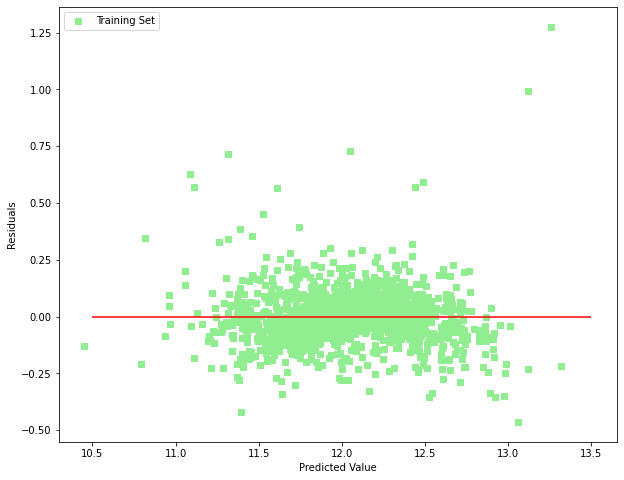

In [282]:
plt.figure(figsize=(10,8))
plt.scatter(y_train_pred,y_train_pred-y,color='lightgreen',marker='s',label='Training Set')
#plt.scatter(y_pred,y_pred-Y_test,color='blue',marker='s',label='Validation Set')
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.hlines(y=0,xmin=10.5,xmax=13.5,color='red')
plt.legend(loc = "upper left")

## 2. Lasso Regression <a class="anchor" id="lasso"></a>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

In [283]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

A key parameter in Lasso regression is the regularized parameter. We can use Lasso Cross Validation to choose the optimal value

In [284]:
lasso=LassoCV(alphas=[0.0001,0.001,0.002,0.003,0.006,0.1,0.15,1,10],cv=5,max_iter=5000)
lasso_model=lasso.fit(x,y)

In [285]:
lasso_best_alpha=lasso_model.alpha_ #the best alpha
lasso_best_alpha

0.001

In [286]:
lasso_model=Lasso(alpha=lasso_best_alpha,max_iter=5000)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scorer=make_scorer(mean_squared_error,greater_is_better=False)
rmse_train=np.sqrt(-cross_val_score(lasso_model,x,y,scoring=scorer,cv=cv))

rmse_mean=rmse_train.mean()
rmse_sd=rmse_train.std()



print("Average RMSE: {}".format(rmse_mean))
print("RMSE: {}".format(rmse_train))

Average RMSE: 0.1266290178868506
RMSE: [0.12670799 0.15385419 0.11276227 0.13652835 0.10329229]


In [287]:
model.append("Lasso Regression")

eval_mean.append(rmse_mean)
eval_std.append(rmse_sd)

In [288]:
#we can also use Lasso to determine the coefficients impact
lasso_model=Lasso(alpha=lasso_best_alpha,max_iter=5000).fit(x,y)

In [289]:
coeff=pd.DataFrame(data=lasso_model.coef_,columns=['Coefficient'],index=X_train.columns)

In [290]:
coeff.loc[coeff['Coefficient']==0]

,Coefficient
LandSlope,0.0
ExterCond,-0.0
BsmtCond,0.0
BsmtFinType1,0.0
BsmtFinType2,0.0
BsmtHalfBath,-0.0
GarageFinish,0.0
OneKitchen,0.0
BelowFiveBedroom,0.0
Street_Encode,0.0


<AxesSubplot:xlabel='Coefficient'>

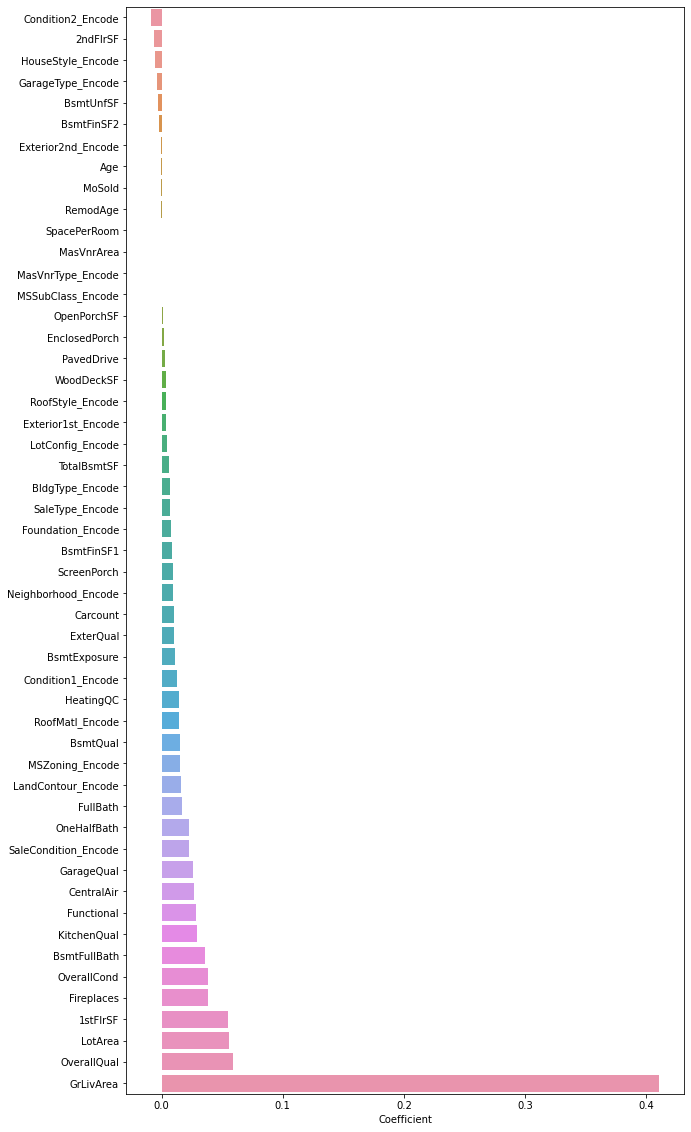

In [291]:
coeff=coeff.sort_values(by='Coefficient')
coefficient=coeff['Coefficient'].loc[coeff['Coefficient'] !=0]
important_features=coeff.loc[coeff['Coefficient'] !=0].index
v
sns.barplot(x=coefficient,y=important_features)

Just like when we do the EDA, the most important features to sales price are mostly related to space of the houses. People also seems to care more about the area in first floor, rather than in 2nd floor.

Such characteristics as the location and surronding neighborhood do not show significant impact to the houses value.

In [292]:
drop_feature=coeff.loc[coeff['Coefficient']==0].index
drop_feature

Index(['BelowFiveBedroom', 'GarageFinish', 'BsmtHalfBath', 'OneKitchen',
       'Heating_Encode', 'BsmtFinType2', 'BsmtFinType1', 'Street_Encode',
       'BsmtCond', 'LotShape_Encode', 'ExterCond', 'LandSlope',
       'Electrical_Encode'],
      dtype='object')

In [293]:
x_revised=x.drop(drop_feature,axis=1)

In [294]:
lasso=LassoCV(alphas=[0.0001,0.001,0.002,0.003,0.006,0.1,0.15,1,10],cv=5,max_iter=5000)
lasso_model=lasso.fit(x_revised,y)
lasso_best_alpha=lasso_model.alpha_ #the best alpha
lasso_best_alpha

0.0001

In [295]:
lasso_model=Lasso(alpha=lasso_best_alpha,max_iter=5000)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scorer=make_scorer(mean_squared_error,greater_is_better=False)
rmse_train=np.sqrt(-cross_val_score(lasso_model,x_revised,y,scoring=scorer,cv=cv))

rmse_mean=rmse_train.mean()
rmse_sd=rmse_train.std()



print("Average RMSE: {}".format(rmse_mean))
print("RMSE: {}".format(rmse_train))

Average RMSE: 0.12635904521211355
RMSE: [0.12583754 0.15247877 0.11329497 0.13650156 0.10368238]


It is apparent that the RMSE has been improved by dropping non-essential variables

In [296]:
model.append("Lasso Regression Revised")

eval_mean.append(rmse_mean)
eval_std.append(rmse_sd)

In [297]:
model

['Linear Regression', 'Lasso Regression', 'Lasso Regression Revised']

## 3. Ridge Regression <a class="anchor" id="ridge"></a>

In [298]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [299]:
ridge=RidgeCV(alphas=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.5],cv=5)
ridge_model=ridge.fit(x,y)

In [300]:
best_alpha=ridge_model.alpha_
best_alpha

0.5

In [301]:
ridge_model=Ridge(alpha=best_alpha)

In [302]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scorer=make_scorer(mean_squared_error,greater_is_better=False)
rmse_train=np.sqrt(-cross_val_score(ridge_model,x,y,scoring=scorer,cv=cv))

rmse_mean=rmse_train.mean()
rmse_sd=rmse_train.std()



print("Average RMSE: {}".format(rmse_mean))
print("RMSE: {}".format(rmse_train))

Average RMSE: 0.12750729457764637
RMSE: [0.12696925 0.15272111 0.11354434 0.13885302 0.10544875]


In [303]:
model.append("Ridge Regression")

eval_mean.append(rmse_mean)
eval_std.append(rmse_sd)

## 4. Elastic Net <a class="anchor" id="elastic"></a>

Elastic Net is another regression model that can combine benefits of both Ridge Regression and Lasso Regression.

What we need to do at first is to tune the hyperameter of alpha and l1_ratio

- **l1_ratio (sometimes called as alpha)**: ratio of L1 penalities, which indicates how much weight you want to put all lasso regression.
- **alpha (usually called as lambda)**: controls the weighting of the sum of both penalties to the loss function. A default value of 1.0 is used to use the fully weighted penalty; a value of 0 excludes the penalty. Very small values of lambada, such as 1e-3 or smaller, are common.

elastic_net_penalty = (alpha * l1_penalty) + ((1 – alpha) * l2_penalty)

elastic_net_loss = loss + (lambda * elastic_net_penalty)






In [268]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV


# define model
Elasticmodel = ElasticNet()
# define model evaluation method
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(Elasticmodel, grid, scoring=scorer, cv=cv, n_jobs=-1)
# perform the search
results = search.fit(x, y)

In [271]:
print('Config: %s' % results.best_params_)

Config: {'alpha': 0.001, 'l1_ratio': 0.7000000000000001}


In [304]:
elastic_model = ElasticNet(alpha=results.best_params_['alpha'],l1_ratio=results.best_params_['l1_ratio'])
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scorer=make_scorer(mean_squared_error,greater_is_better=False)
rmse_train=np.sqrt(-cross_val_score(elastic_model,x,y,scoring=scorer,cv=cv))

rmse_mean=rmse_train.mean()
rmse_sd=rmse_train.std()



print("Average RMSE: {}".format(rmse_mean))
print("RMSE: {}".format(rmse_train))

Average RMSE: 0.12654572741119735
RMSE: [0.12657918 0.15341793 0.11269764 0.13650202 0.10353186]


Let's fit on the simplied X set

In [305]:
elastic_model = ElasticNet(alpha=results.best_params_['alpha'],l1_ratio=results.best_params_['l1_ratio'])
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scorer=make_scorer(mean_squared_error,greater_is_better=False)
rmse_train=np.sqrt(-cross_val_score(elastic_model,x_revised,y,scoring=scorer,cv=cv))

rmse_mean=rmse_train.mean()
rmse_sd=rmse_train.std()



print("Average RMSE: {}".format(rmse_mean))
print("RMSE: {}".format(rmse_train))

Average RMSE: 0.12635417332315582
RMSE: [0.12609105 0.15340235 0.11264698 0.13648584 0.10314465]


Average RMSE has been improved a bit.

In [306]:
model.append("ElasticNet Regression")

eval_mean.append(rmse_mean)
eval_std.append(rmse_sd)

## 5. Random Forest Regressor <a class="anchor" id="randomforest"></a>

In [309]:
from sklearn.ensemble import RandomForestRegressor

In [313]:
from sklearn.model_selection import GridSearchCV

RD_model=RandomForestRegressor()
grid_values={'n_estimators':[50,60,70,100,120,150],'max_depth':[4,5,6,7,8,9,10,15,20]}
grid_clf_acc = GridSearchCV(RD_model, param_grid = grid_values,scoring=scorer)
grid_clf_acc.fit(x, y)

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)

Grid best parameter (max. accuracy):  {'max_depth': 15, 'n_estimators': 70}


In [314]:
RD=RandomForestRegressor(n_estimators=grid_clf_acc.best_params_['n_estimators'],max_depth=grid_clf_acc.best_params_['max_depth'])

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scorer=make_scorer(mean_squared_error,greater_is_better=False)
rmse_train=np.sqrt(-cross_val_score(RD,x,y,scoring=scorer,cv=cv))

rmse_mean=rmse_train.mean()
rmse_sd=rmse_train.std()



print("Average RMSE: {}".format(rmse_mean))
print("RMSE: {}".format(rmse_train))

Average RMSE: 0.14124217877373169
RMSE: [0.14193348 0.16447365 0.14225304 0.13826501 0.11928572]


## 6. XGBoost Regressor <a class="anchor" id="xgboost"></a>

XGBoost is obviously the most widely-used algorithm in data science competitions.

The most difficult part of XGBoost is how to find the optimal parameters for model fitting. To assist this task, I will use GridSearch CV and sequentially optimize each common parameters

In [316]:
def RMSE(model,x,y,nfold):
    import random
    random.seed(123)
    from sklearn.model_selection import KFold
    cv = KFold(n_splits=nfold, random_state=1, shuffle=True)
    scorer=make_scorer(mean_squared_error,greater_is_better=False)
    rmse_train=np.sqrt(-cross_val_score(model,x,y,scoring=scorer,cv=cv))

    print("Average RMSE: {}".format(rmse_train.mean()))
    print("RMSE: {}".format(rmse_train))

In [315]:
!pip install xgboost
import xgboost as xgb

To create a baseline model, I will simply fit a XGBRegressor with some initial parameters

In [320]:
xgb_tune = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,alpha=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 scale_pos_weight=0,
 seed=123)

RMSE(xgb_tune,x,y,5)

Average RMSE: 0.12299591041395627
RMSE: [0.12612758 0.13820491 0.11950635 0.1304574  0.10068331]


It is interesting that though we have not fine tuned any, the outcome is already much better than other previous models.

The first step is to fine tune 'n_estimators': The number of sequential trees to be modeled 

In [328]:
xgb_tune = xgb.XGBRegressor(
 learning_rate =0.01,
  max_depth=5,
 min_child_weight=1,
 gamma=0,alpha=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 scale_pos_weight=1,
 seed=123)


scorer=make_scorer(mean_squared_error,greater_is_better=False)
grid_values={'n_estimators':range(100,2000,100)}
cv = KFold(n_splits=5, random_state=1, shuffle=True)
grid_clf_acc = GridSearchCV(xgb_tune, param_grid = grid_values,scoring=scorer,cv=cv)
grid_clf_acc.fit(x,y)

grid_clf_acc.best_params_,np.sqrt(-grid_clf_acc.best_score_)

({'n_estimators': 1900}, 0.12022611271517354)

Next, we will find the value of.

- max_depth

- min_child_weight:the minimum sum of weights of all observations required in a child.

We will also fix our n_estimators to 1900

In [330]:
xgb_tune = xgb.XGBRegressor(
 learning_rate =0.01,
 n_estimators=1900,
 max_depth=5, min_child_weight=1,
 gamma=0,alpha=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 scale_pos_weight=1,
 seed=123)


scorer=make_scorer(mean_squared_error,greater_is_better=False)
grid_values={'max_depth':range(4,10,1),'min_child_weight':range(1,6,1)}
cv = KFold(n_splits=5, random_state=1, shuffle=True)
grid_clf_acc = GridSearchCV(xgb_tune, param_grid = grid_values,scoring=scorer,cv=cv)
grid_clf_acc.fit(x,y)

grid_clf_acc.best_params_,np.sqrt(-grid_clf_acc.best_score_)

({'max_depth': 4, 'min_child_weight': 2}, 0.11824793699184784)

Fine tune **gamma**:

A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.

In [331]:
xgb_tune = xgb.XGBRegressor(
 learning_rate =0.01,
 n_estimators=1900,
 max_depth=4, min_child_weight=2,
 gamma=0,alpha=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 scale_pos_weight=1,
 seed=123)

scorer=make_scorer(mean_squared_error,greater_is_better=False)
grid_values={'gamma':[i/10 for i in range(0,6,1)]}
cv = KFold(n_splits=5, random_state=1, shuffle=True)

grid_clf_acc = GridSearchCV(xgb_tune, param_grid = grid_values,scoring=scorer,cv=cv)
grid_clf_acc.fit(x,y)

grid_clf_acc.best_params_,np.sqrt(-grid_clf_acc.best_score_)

({'gamma': 0.0}, 0.11824793699184784)

Fine tune **subsample** and **colsample_bytree**

In [333]:
xgb_tune = xgb.XGBRegressor(
 learning_rate =0.01,
 n_estimators=1900,
 max_depth=4, min_child_weight=2,
 gamma=0,alpha=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 scale_pos_weight=1,
 seed=123)

scorer=make_scorer(mean_squared_error,greater_is_better=False)
grid_values={'subsample':[0.5,0.6,0.7,0.8,0.9],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}
cv = KFold(n_splits=5, random_state=1, shuffle=True)

grid_clf_acc = GridSearchCV(xgb_tune, param_grid = grid_values,scoring=scorer,cv=cv)
grid_clf_acc.fit(x,y)

grid_clf_acc.best_params_,np.sqrt(-grid_clf_acc.best_score_)

({'colsample_bytree': 0.9, 'subsample': 0.5}, 0.11692468460224818)

The final hyper-parameter that I will fine tune is "alpha": L1 regularization term on weight (analogous to Lasso regression)

In [334]:
xgb_tune = xgb.XGBRegressor(
 learning_rate =0.01,
 n_estimators=1900,
 max_depth=4, min_child_weight=2,
 gamma=0,alpha=0,
 subsample=0.5,
 colsample_bytree=0.9,
 objective= 'reg:squarederror',
 scale_pos_weight=1,
 seed=123)

scorer=make_scorer(mean_squared_error,greater_is_better=False)
grid_values={'alpha':[0.01,0.05,0.1,0.5,1,10,50,100]}
cv = KFold(n_splits=5, random_state=1, shuffle=True)

grid_clf_acc = GridSearchCV(xgb_tune, param_grid = grid_values,scoring=scorer,cv=cv)
grid_clf_acc.fit(x,y)

grid_clf_acc.best_params_,np.sqrt(-grid_clf_acc.best_score_)

({'alpha': 0.01}, 0.11696721813267275)

In [380]:
xgb_tune = xgb.XGBRegressor(
 learning_rate =0.01,
 n_estimators=1900,
 max_depth=4, min_child_weight=2,
 gamma=0,alpha=0.01,
 subsample=0.5,
 colsample_bytree=0.9,
 objective= 'reg:squarederror',
 scale_pos_weight=1,
 seed=123)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
scorer=make_scorer(mean_squared_error,greater_is_better=False)
rmse_train=np.sqrt(-cross_val_score(xgb_tune,x,y,scoring=scorer,cv=cv))

rmse_mean=rmse_train.mean()
rmse_sd=rmse_train.std()



print("Average RMSE: {}".format(rmse_mean))
print("RMSE: {}".format(rmse_train))



Average RMSE: 0.11650322715255963
RMSE: [0.12027498 0.1308675  0.11135498 0.12026207 0.09975661]


In [337]:
model.append("XGBoost")

eval_mean.append(rmse_mean)
eval_std.append(rmse_sd)

With XGBoost, we can also plot the importance of features

<AxesSubplot:xlabel='score'>

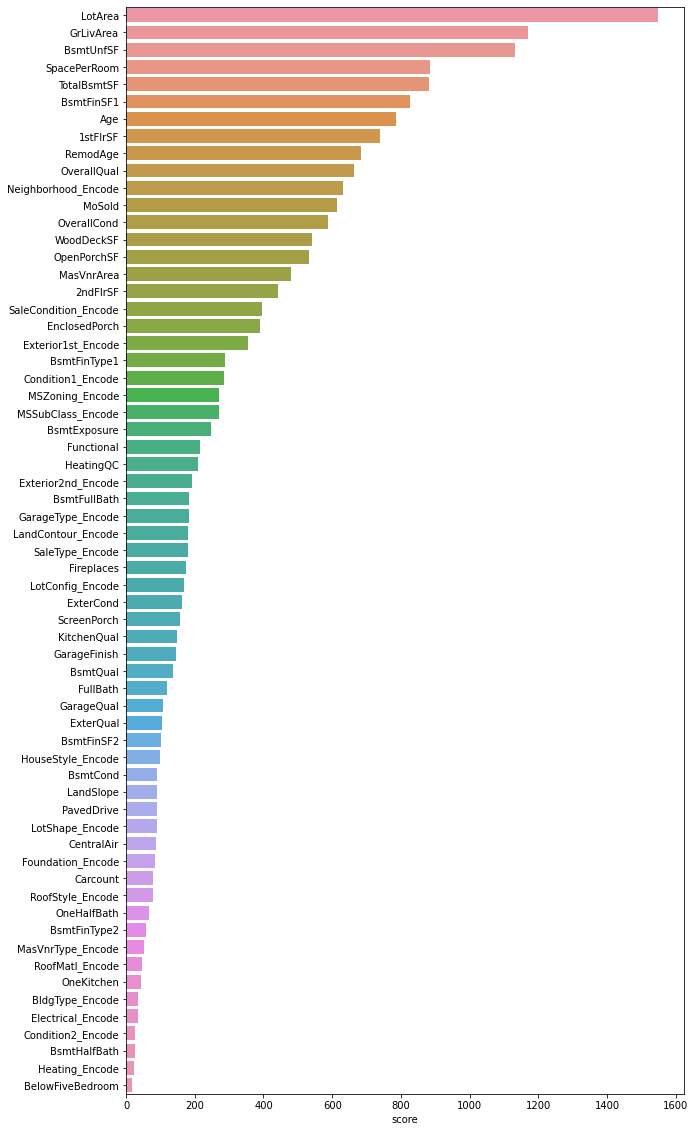

In [402]:
feature_important = xgb_tune.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
plt.figure(figsize=(10,20))
sns.barplot(x=data.score,y=data.index)

## 7. Stacking Model <a class="stacking" id="xgboost"></a>

I will run stacking model also to see if the prediction accuracy can be greatly improved 

In [349]:
from sklearn.ensemble import StackingRegressor

level0 = list()
level0.append(('ridge',ridge_model))
level0.append(('linea',lr))
level0.append(('ElasticNet', elastic_model))
#level0.append(('RandomForest', RandomForestRegressor(n_estimators=60,max_depth=15)))
level0.append(('XGboost',xgb_tune))
level0.append(('LassoRegression', lasso_model))

# define meta learner model
level1 = elastic_model
# define the stacking ensemble
stack_model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5,passthrough=True)
# fit the model on all available data
#stack_model=stack_model.fit(x, y)

In [350]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scorer=make_scorer(mean_squared_error,greater_is_better=False)
rmse_train=np.sqrt(-cross_val_score(stack_model,x,y,scoring=scorer,cv=cv))

rmse_mean=rmse_train.mean()
rmse_sd=rmse_train.std()



print("Average RMSE: {}".format(rmse_mean))
print("RMSE: {}".format(rmse_train))

Average RMSE: 0.11687265270776195
RMSE: [0.11917077 0.13860908 0.10557165 0.12456782 0.09644394]


In [352]:
model.append("Stacking")

eval_mean.append(rmse_mean)
eval_std.append(rmse_sd)

In [361]:
result_table=pd.DataFrame(zip(model,eval_mean,eval_std),columns=['Model','Mean','Std'])
result_table

,Model,Mean,Std
0,Linear Regression,0.127645,0.016850
1,Lasso Regression,0.126629,0.017754
2,Lasso Regression Revised,0.126359,0.017148
3,Ridge Regression,0.127507,0.017008
4,ElasticNet Regression,0.126354,0.017669
5,XGBoost,0.116503,0.010408
6,Stacking,0.116873,0.014711


Based on Cross-Validation, we can easily that XGBoost is the best model, with lowest mean and variance of RMSE

# Submission

In [362]:
submission=pd.DataFrame()

In [363]:
submission['Id']=test.Id

In [378]:
xgb_tune = xgb.XGBRegressor(
 learning_rate =0.01,
 n_estimators=1900,
 max_depth=4, min_child_weight=2,
 gamma=0,alpha=0.01,
 subsample=0.5,
 colsample_bytree=0.9,
 objective= 'reg:squarederror',
 scale_pos_weight=1,
 seed=123).fit(x,y)

In [369]:
test_pred=np.expm1(xgb_tune.predict(test_data))

In [370]:
submission['SalePrice']=test_pred

In [371]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 17.2 KB


In [372]:
submission

,Id,SalePrice
0,1461,121896.593750
1,1462,164148.906250
2,1463,180666.046875
3,1464,191166.062500
4,1465,186090.031250
...,...,...
1454,2915,80513.085938
1455,2916,77816.984375
1456,2917,156430.406250
1457,2918,115848.429688


In [373]:
submission.to_csv('submission_Khoi.csv', index=False)